# Experiment 1: Results of copying algorithms in higher dimensions

In this notebook, we show results corresponding to Experiment 1, described in the thesis report. Specifically, we present the fidelities and accuracies of the different copies (SNN, MNN, LNN, and GB, appearing in this order for each black box) trained with Algorithms 1 and 2 in the UCI high-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the hard copies. In addition, we show plots that describe the evolution of these metrics across different training dataset sizes, where computations were limited to 1,000,000 synthetic samples and 240 seconds.

As a remark, all metrics and plots shown in this notebook have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import pandas as pd
import types
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Breast cancer dataset

### Black box 1: Random Forest classifier

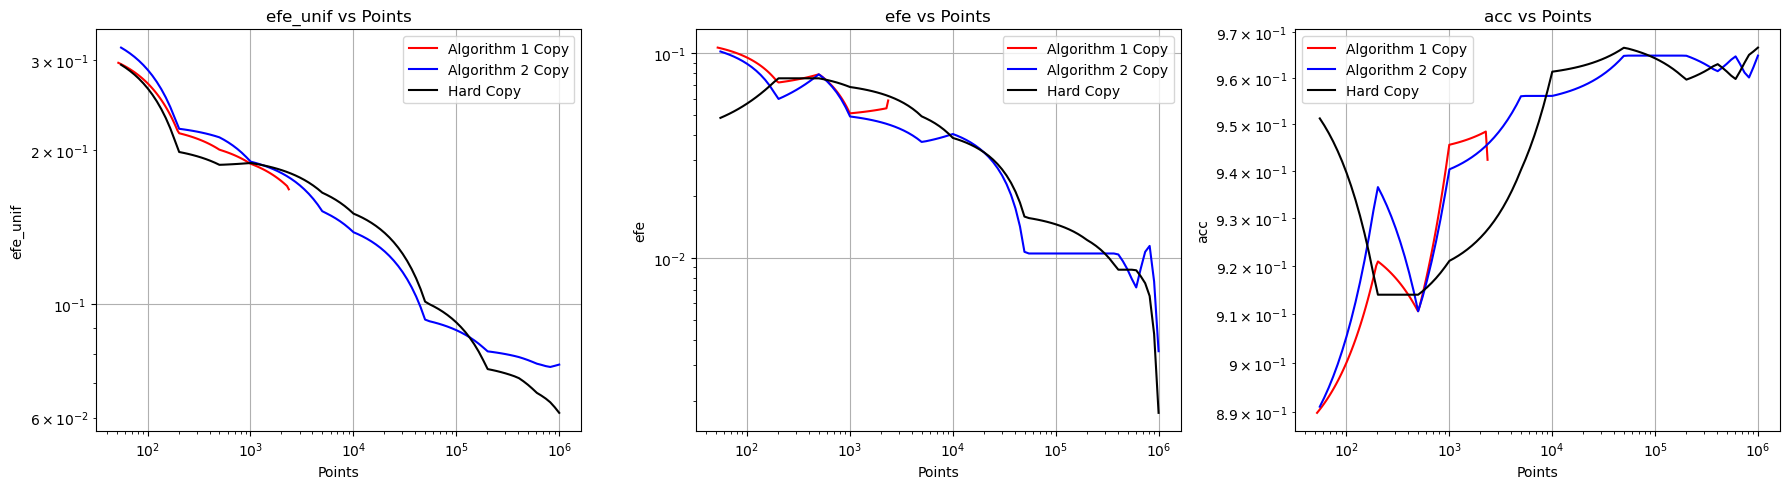

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9491   0.0301 0.0544   0.0218      0.1678        0.0082    2451.4000  64.8062
 Model 2 0.9649   0.0055 0.0035   0.0043      0.0762        0.0017 1000000.0000   0.0000
 Model 3 0.9667   0.0066 0.0018   0.0035      0.0613        0.0029 1000000.0000   0.0000
Blackbox 0.9684   0.0089                                                                


In [3]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_1_1_seed")
print(summary_df.to_string(index=False))

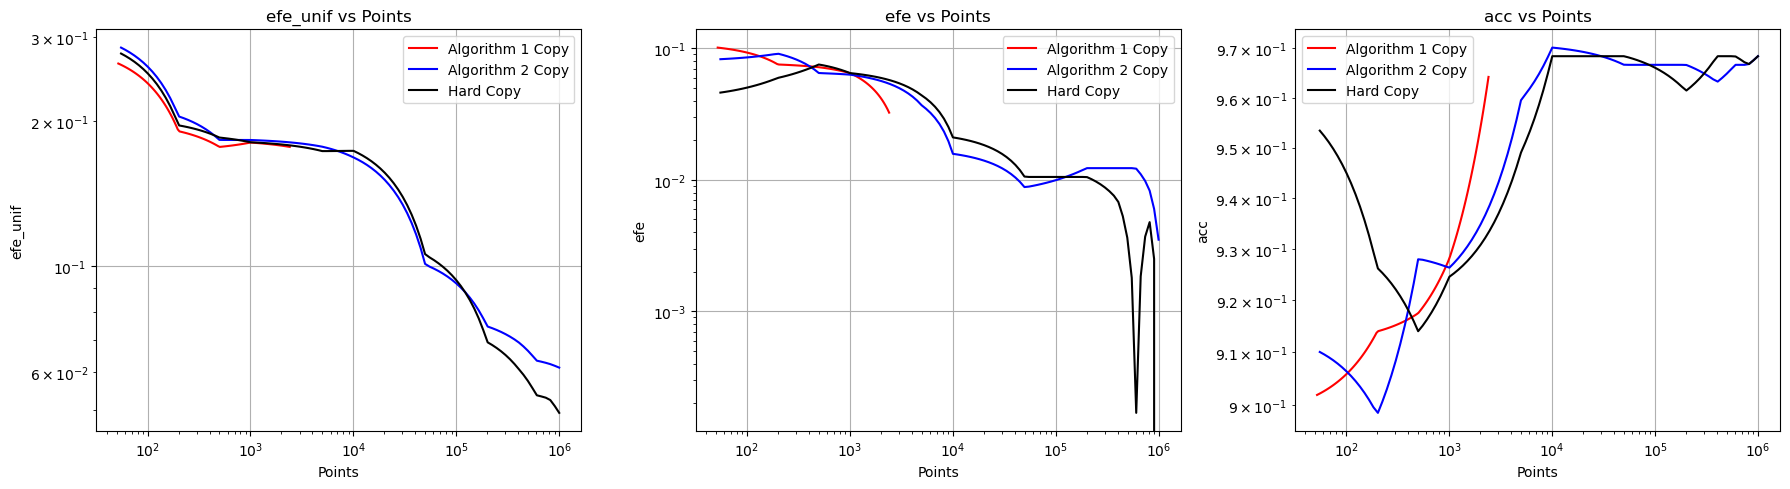

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9649   0.0192 0.0316   0.0089      0.1771        0.0104    2473.0000  55.2268
 Model 2 0.9684   0.0070 0.0035   0.0043      0.0613        0.0023 1000000.0000   0.0000
 Model 3 0.9684   0.0089 0.0000   0.0000      0.0493        0.0016 1000000.0000   0.0000
Blackbox 0.9684   0.0089                                                                


In [4]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_1_2_seed")
print(summary_df.to_string(index=False))

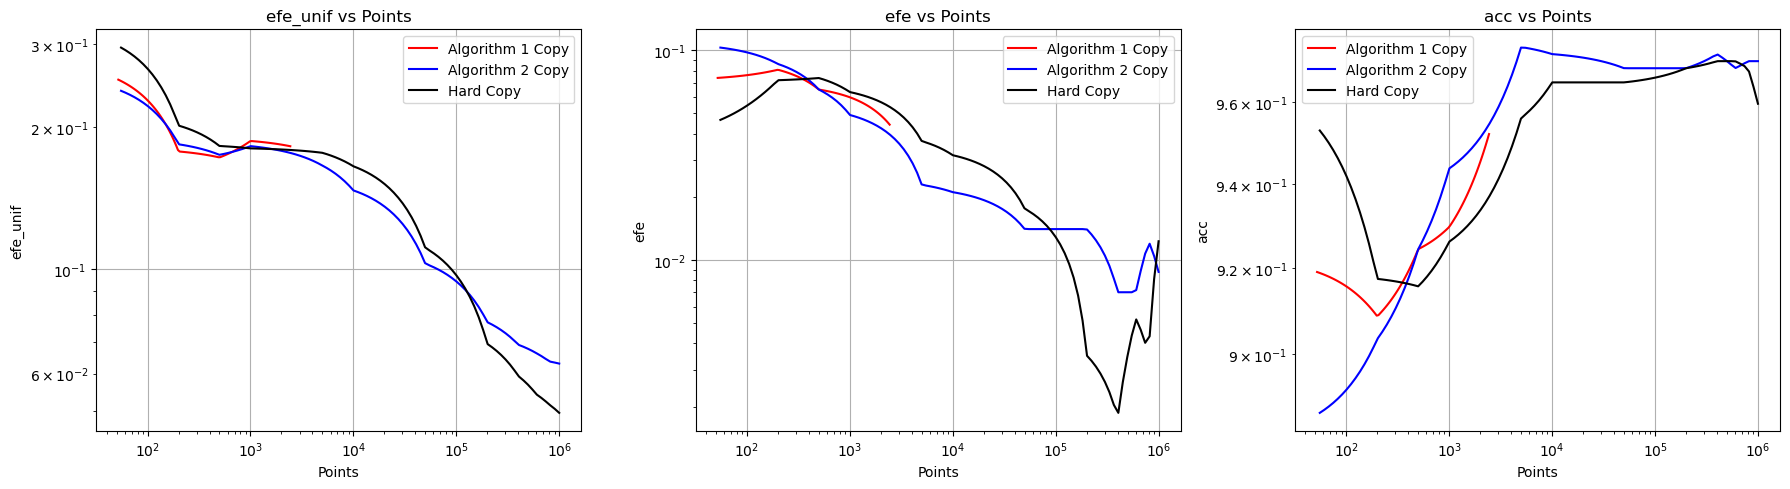

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9526   0.0264 0.0439   0.0192      0.1821        0.0107    2464.8000  30.1622
 Model 2 0.9702   0.0089 0.0088   0.0078      0.0630        0.0018 1000000.0000   0.0000
 Model 3 0.9596   0.0119 0.0123   0.0089      0.0496        0.0018 1000000.0000   0.0000
Blackbox 0.9684   0.0089                                                                


In [5]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_1_3_seed")
print(summary_df.to_string(index=False))

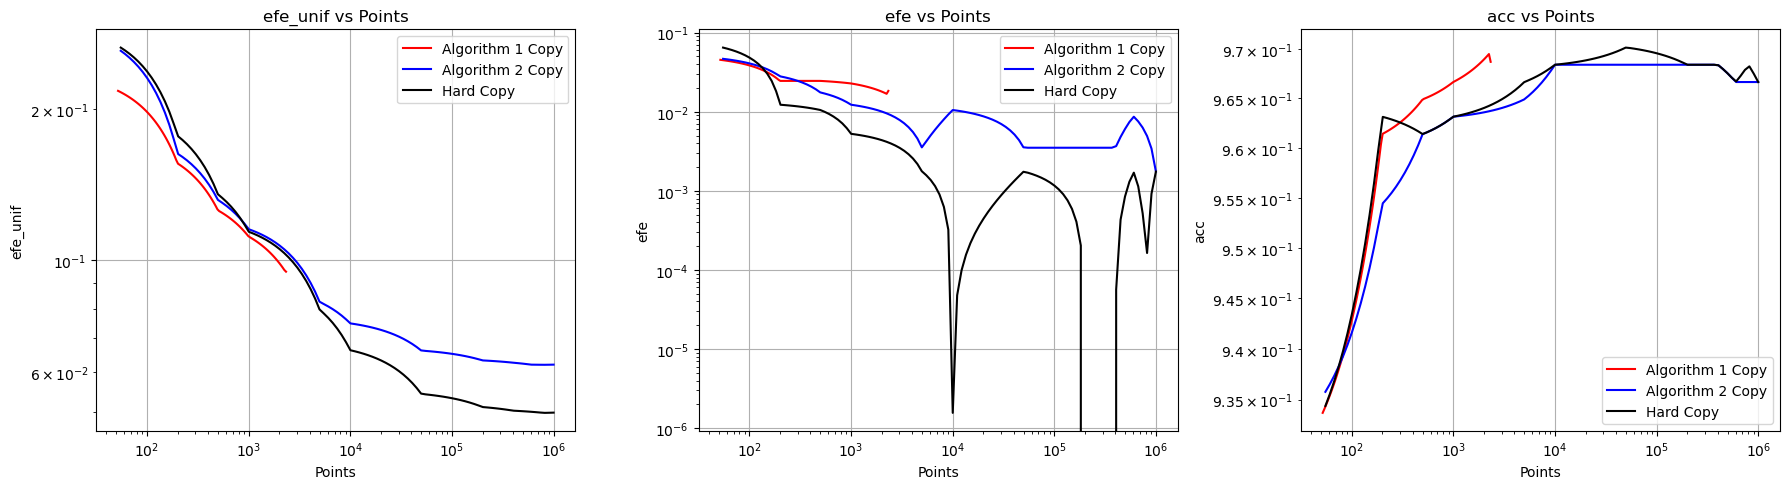

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9702   0.0089 0.0158   0.0116      0.0933        0.0028    2437.4000  78.7873
 Model 2 0.9667   0.0066 0.0018   0.0035      0.0621        0.0017 1000000.0000   0.0000
 Model 3 0.9667   0.0066 0.0018   0.0035      0.0498        0.0024 1000000.0000   0.0000
Blackbox 0.9684   0.0089                                                                


In [6]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_1_4_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

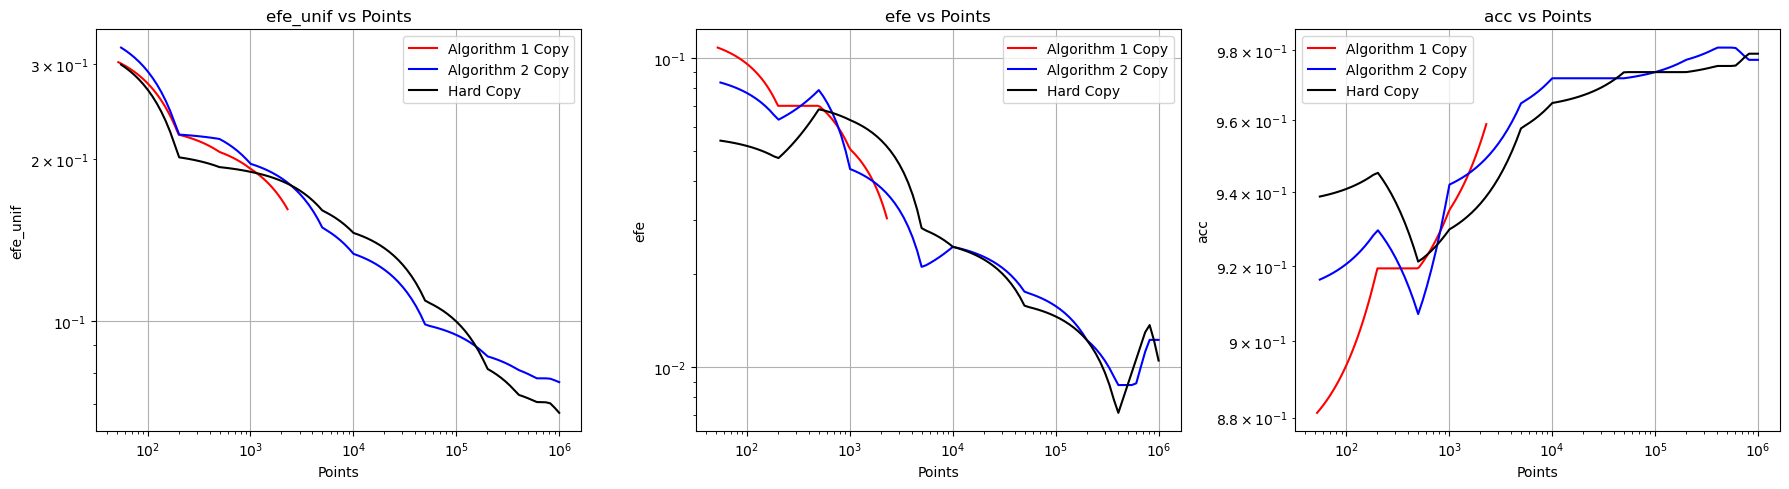

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9596   0.0226 0.0298   0.0181      0.1606        0.0043    2321.4000  21.3785
 Model 2 0.9772   0.0172 0.0123   0.0089      0.0769        0.0043 1000000.0000   0.0000
 Model 3 0.9789   0.0119 0.0105   0.0035      0.0674        0.0048 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [7]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_2_1_seed")
print(summary_df.to_string(index=False))

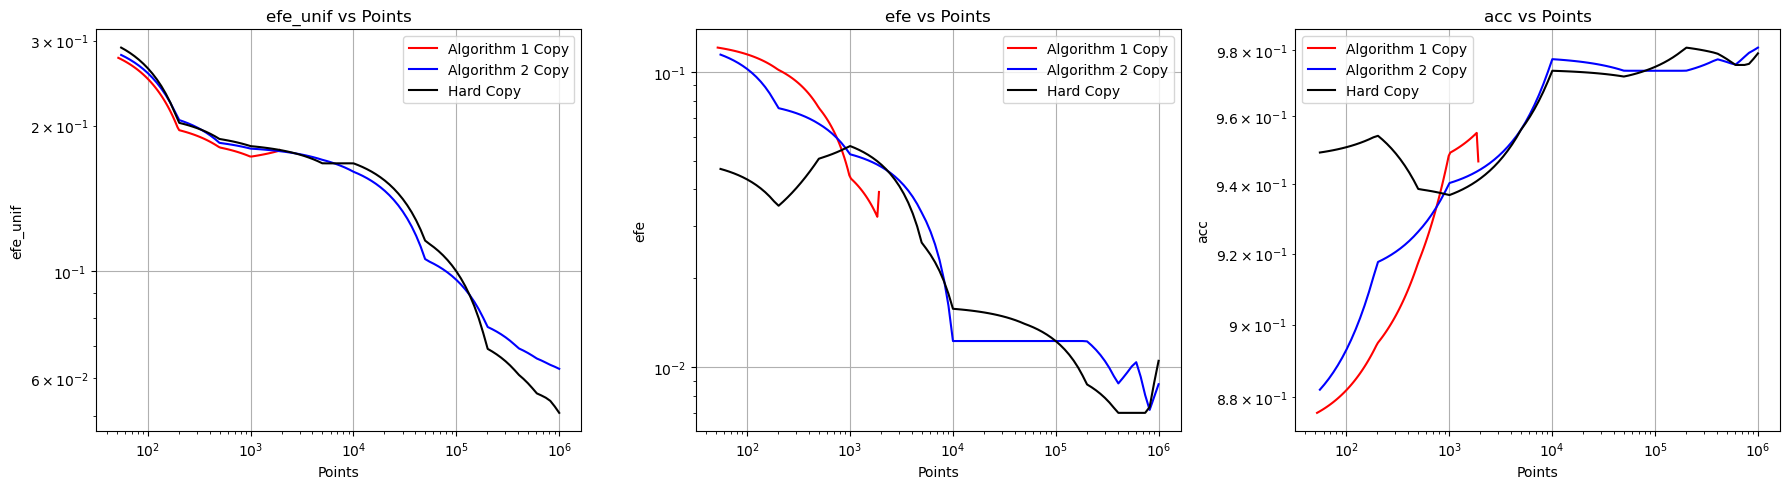

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9579   0.0390 0.0281   0.0339      0.1798        0.0092    2237.6000 174.4083
 Model 2 0.9807   0.0116 0.0088   0.0055      0.0627        0.0062 1000000.0000   0.0000
 Model 3 0.9789   0.0119 0.0105   0.0035      0.0508        0.0039 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [8]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_2_2_seed")
print(summary_df.to_string(index=False))

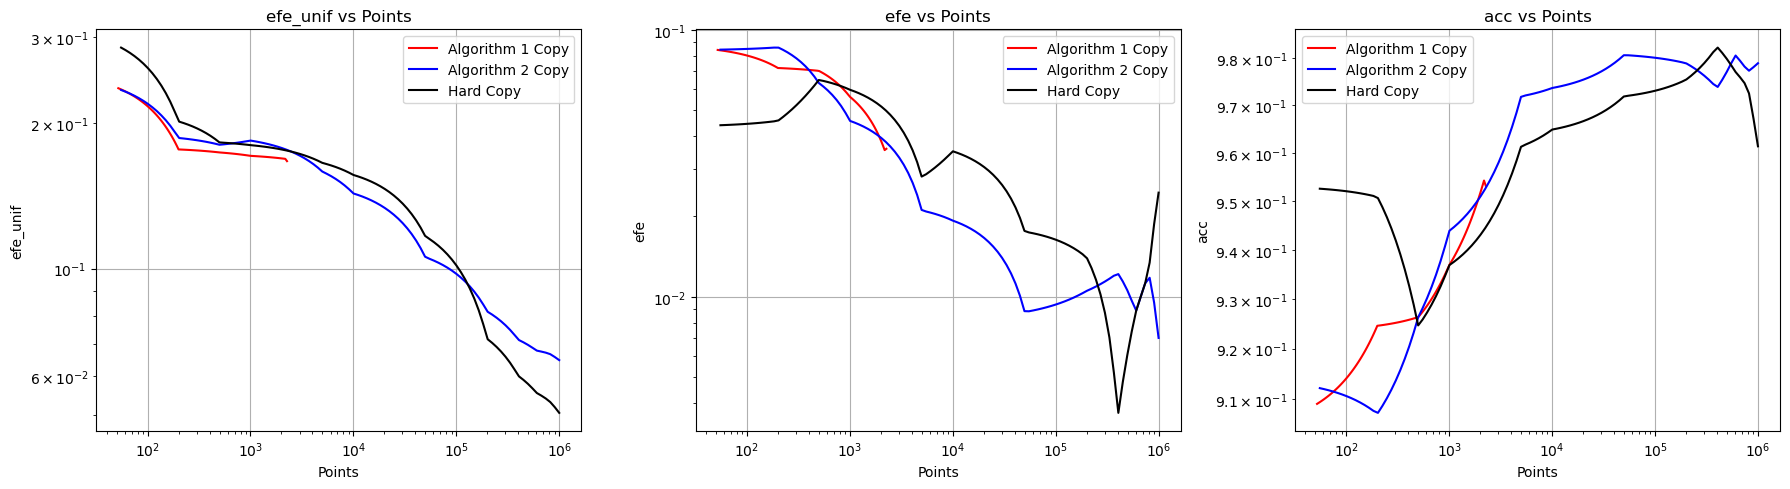

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9561   0.0288 0.0333   0.0195      0.1683        0.0126    2312.0000  33.5142
 Model 2 0.9789   0.0089 0.0070   0.0066      0.0648        0.0050 1000000.0000   0.0000
 Model 3 0.9614   0.0153 0.0246   0.0170      0.0504        0.0037 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [9]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_2_3_seed")
print(summary_df.to_string(index=False))

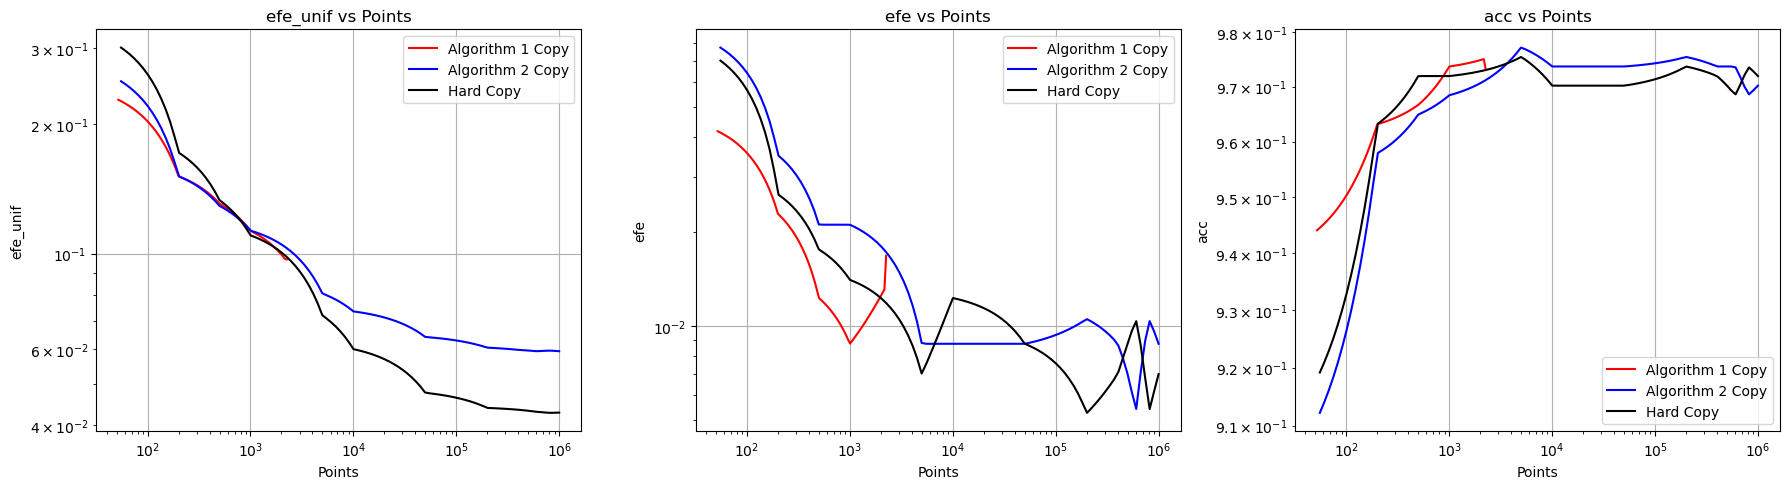

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9754   0.0151 0.0140   0.0239      0.0938        0.0023    2411.2000  83.9033
 Model 2 0.9702   0.0089 0.0088   0.0055      0.0594        0.0027 1000000.0000   0.0000
 Model 3 0.9719   0.0086 0.0070   0.0066      0.0428        0.0042 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [10]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_2_4_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

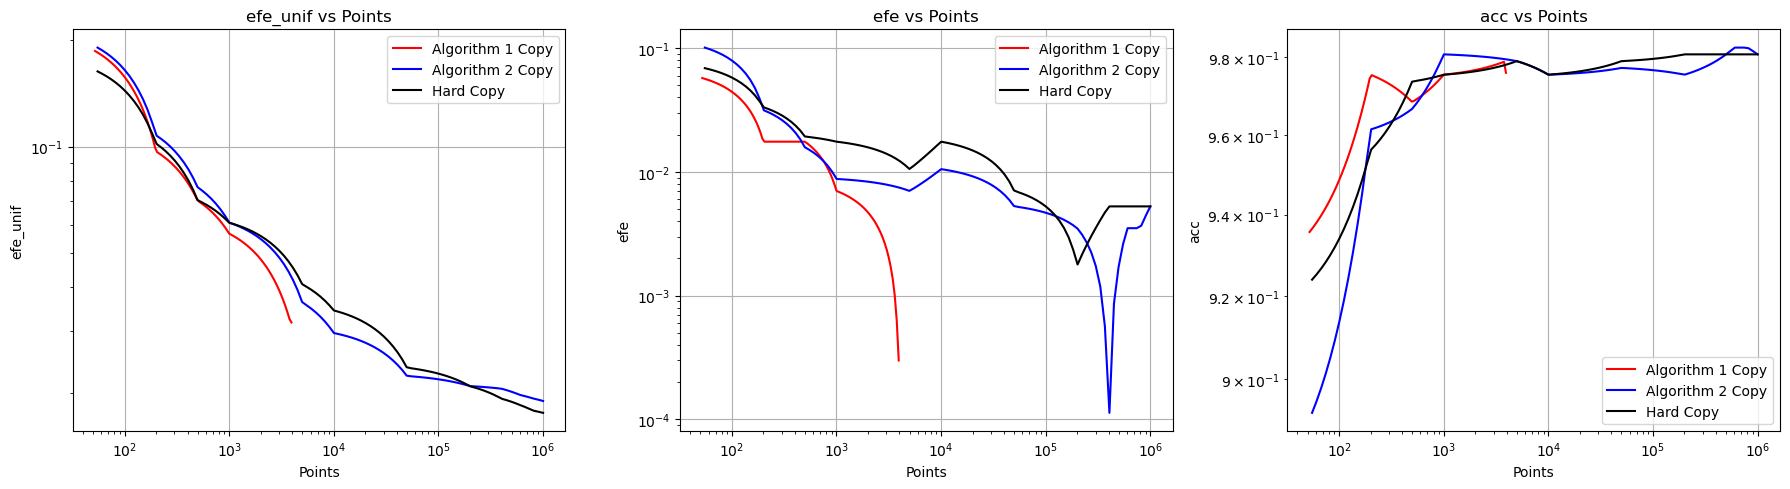

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9789   0.0153 0.0000   0.0000      0.0298        0.0024    4073.0000  84.6570
 Model 2 0.9807   0.0102 0.0053   0.0070      0.0190        0.0012 1000000.0000   0.0000
 Model 3 0.9807   0.0102 0.0053   0.0070      0.0176        0.0015 1000000.0000   0.0000
Blackbox 0.9789   0.0153                                                                


In [11]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_3_1_seed")
print(summary_df.to_string(index=False))

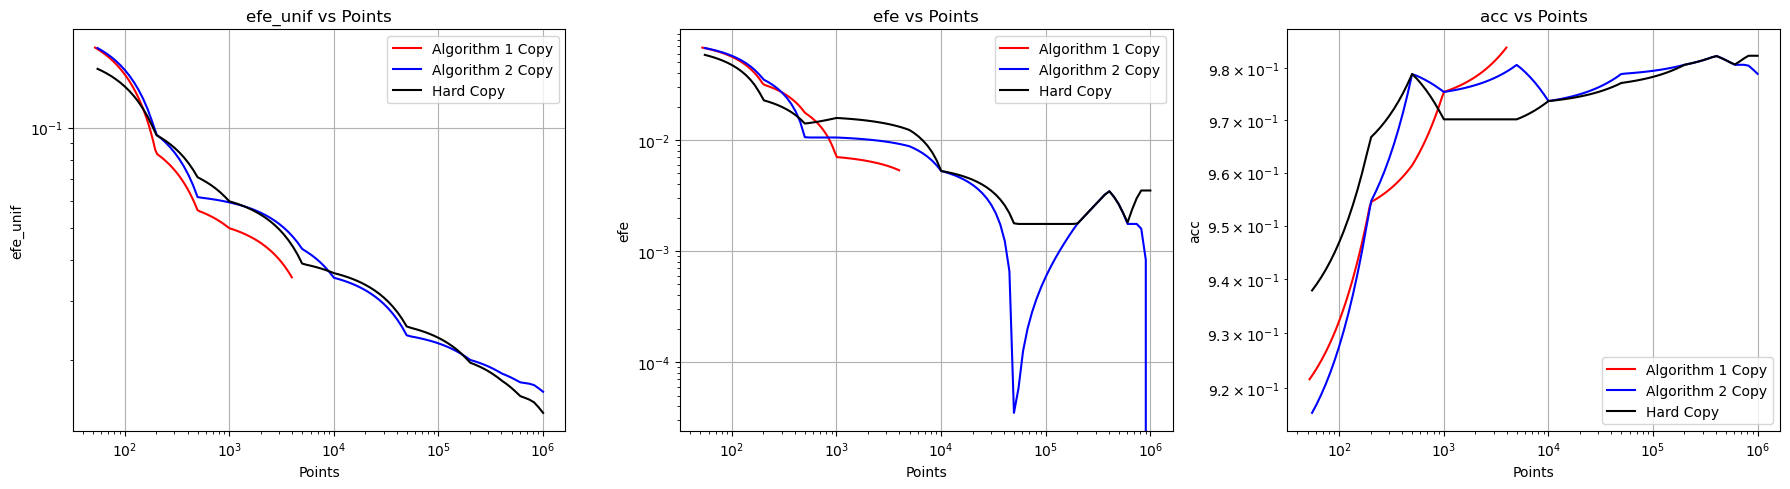

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9842   0.0102 0.0053   0.0043      0.0351        0.0090    4057.6000  69.4855
 Model 2 0.9789   0.0070 0.0000   0.0000      0.0160        0.0017 1000000.0000   0.0000
 Model 3 0.9825   0.0096 0.0035   0.0043      0.0138        0.0016 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [12]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_3_2_seed")
print(summary_df.to_string(index=False))

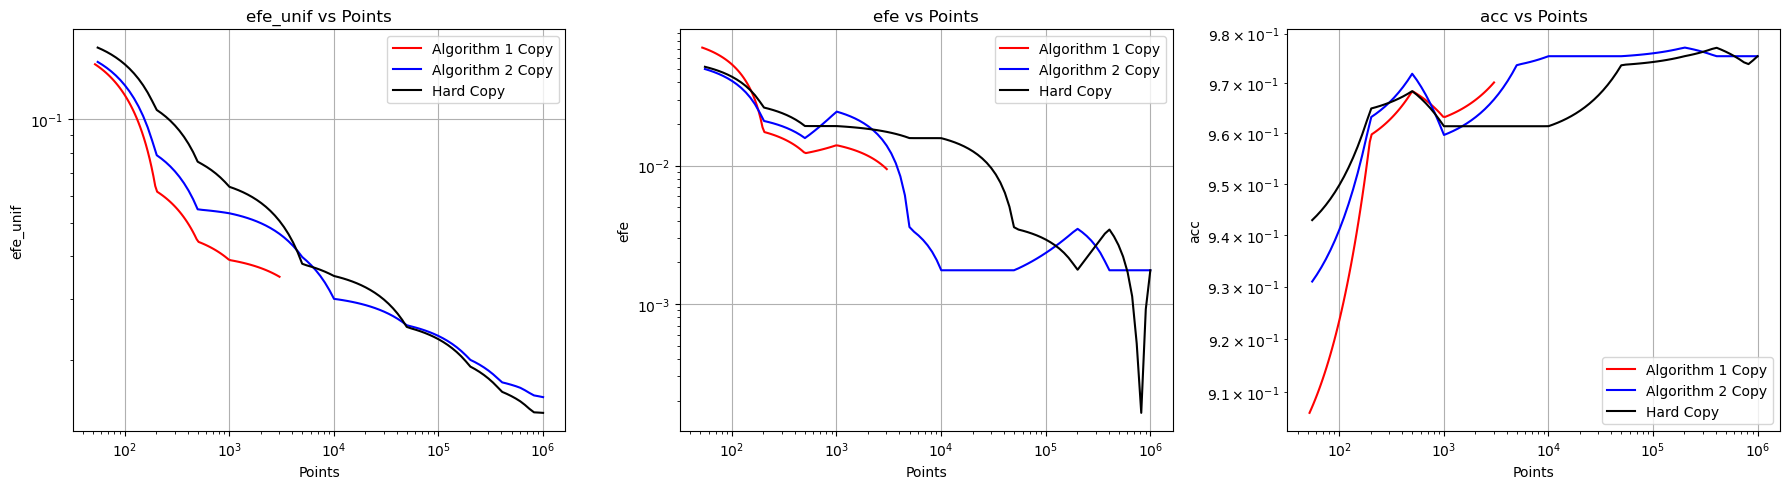

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9719   0.0066 0.0088   0.0096      0.0342        0.0067    3656.0000 326.0485
 Model 2 0.9754   0.0066 0.0018   0.0035      0.0156        0.0016 1000000.0000   0.0000
 Model 3 0.9754   0.0066 0.0018   0.0035      0.0140        0.0017 1000000.0000   0.0000
Blackbox 0.9737   0.0096                                                                


In [13]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_3_3_seed")
print(summary_df.to_string(index=False))

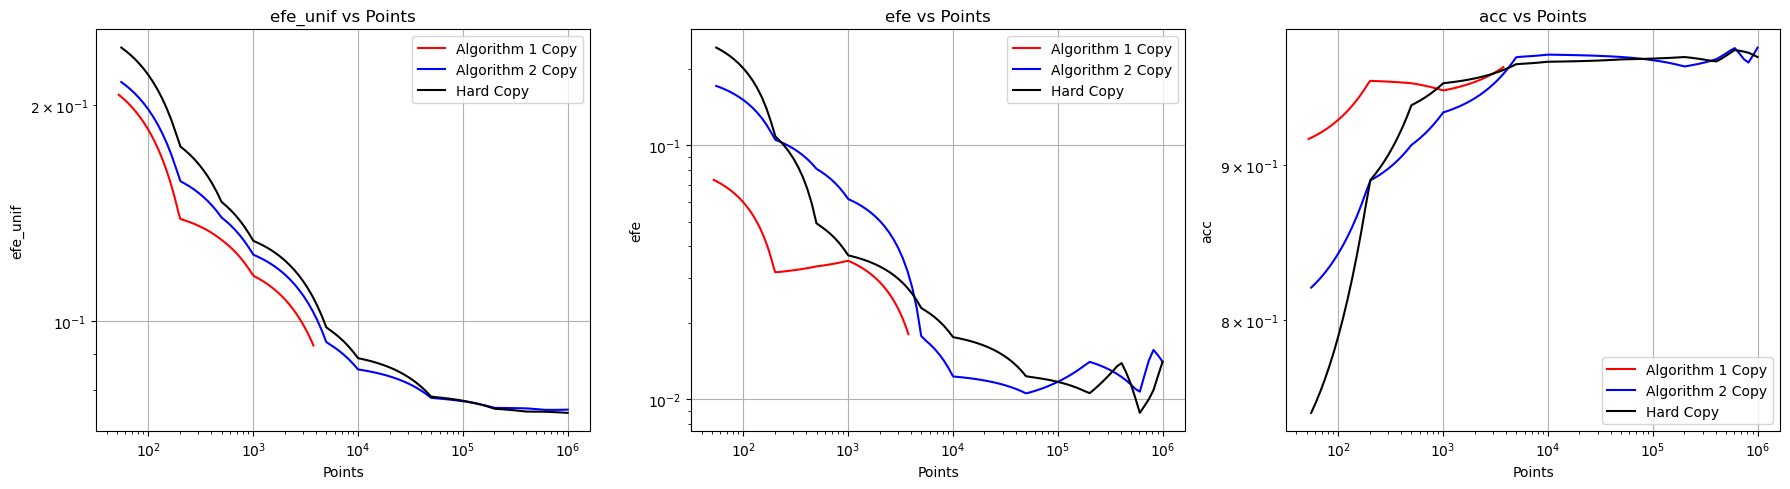

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9719   0.0151 0.0158   0.0129      0.0887        0.0079    4206.6000 227.2167
 Model 2 0.9842   0.0102 0.0140   0.0105      0.0752        0.0062 1000000.0000   0.0000
 Model 3 0.9772   0.0163 0.0140   0.0070      0.0744        0.0064 1000000.0000   0.0000
Blackbox 0.9807   0.0066                                                                


In [14]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS4_3_4_seed")
print(summary_df.to_string(index=False))

## Rice dataset

### Black box 1: Random Forest classifier

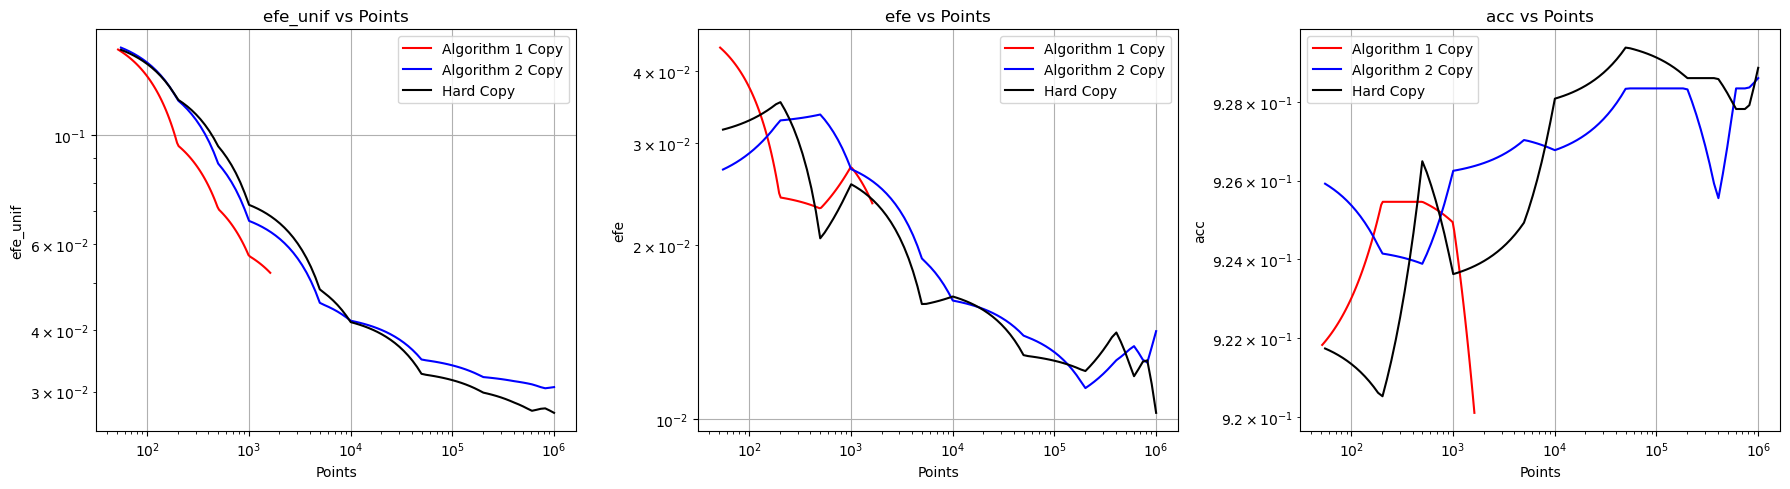

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9199   0.0094 0.0234   0.0078      0.0523        0.0052    1648.2000  19.6713
 Model 2 0.9286   0.0041 0.0142   0.0051      0.0306        0.0033 1000000.0000   0.0000
 Model 3 0.9289   0.0071 0.0102   0.0042      0.0272        0.0032 1000000.0000   0.0000
Blackbox 0.9249   0.0045                                                                


In [15]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_1_1_seed")
print(summary_df.to_string(index=False))

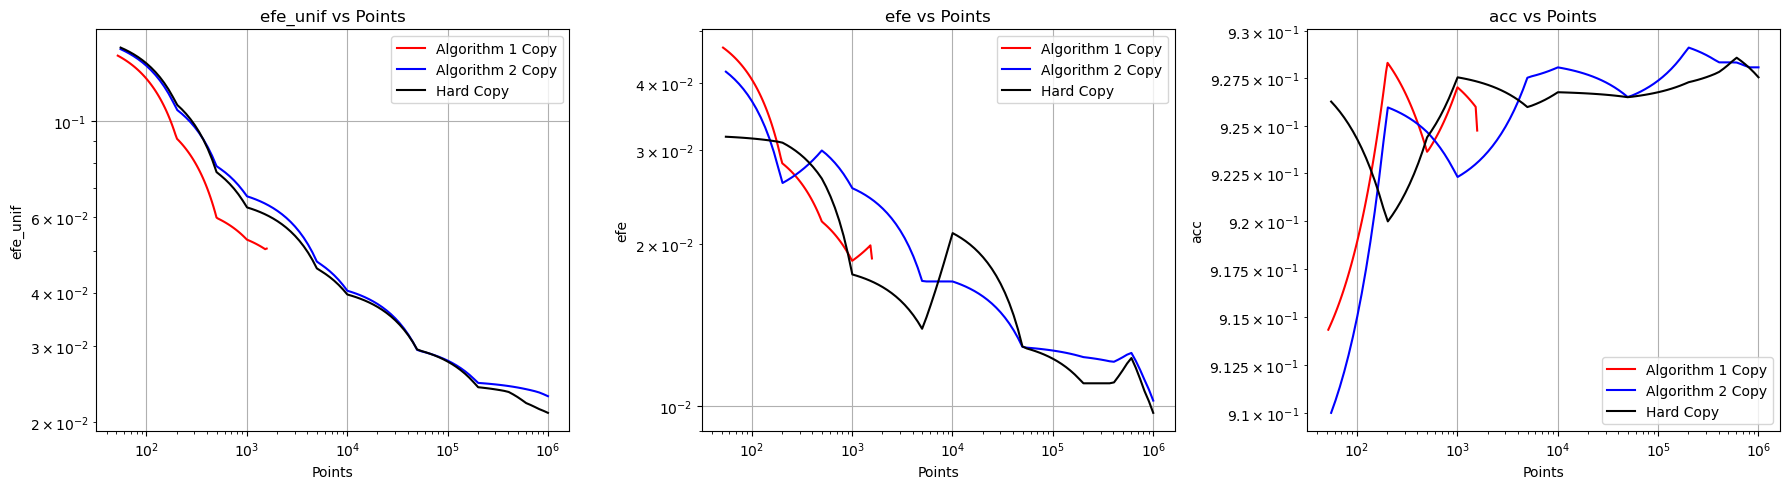

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9260   0.0061 0.0202   0.0041      0.0501        0.0048    1616.0000  34.4732
 Model 2 0.9281   0.0038 0.0102   0.0040      0.0230        0.0014 1000000.0000   0.0000
 Model 3 0.9276   0.0056 0.0097   0.0049      0.0210        0.0015 1000000.0000   0.0000
Blackbox 0.9262   0.0036                                                                


In [16]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_1_2_seed")
print(summary_df.to_string(index=False))

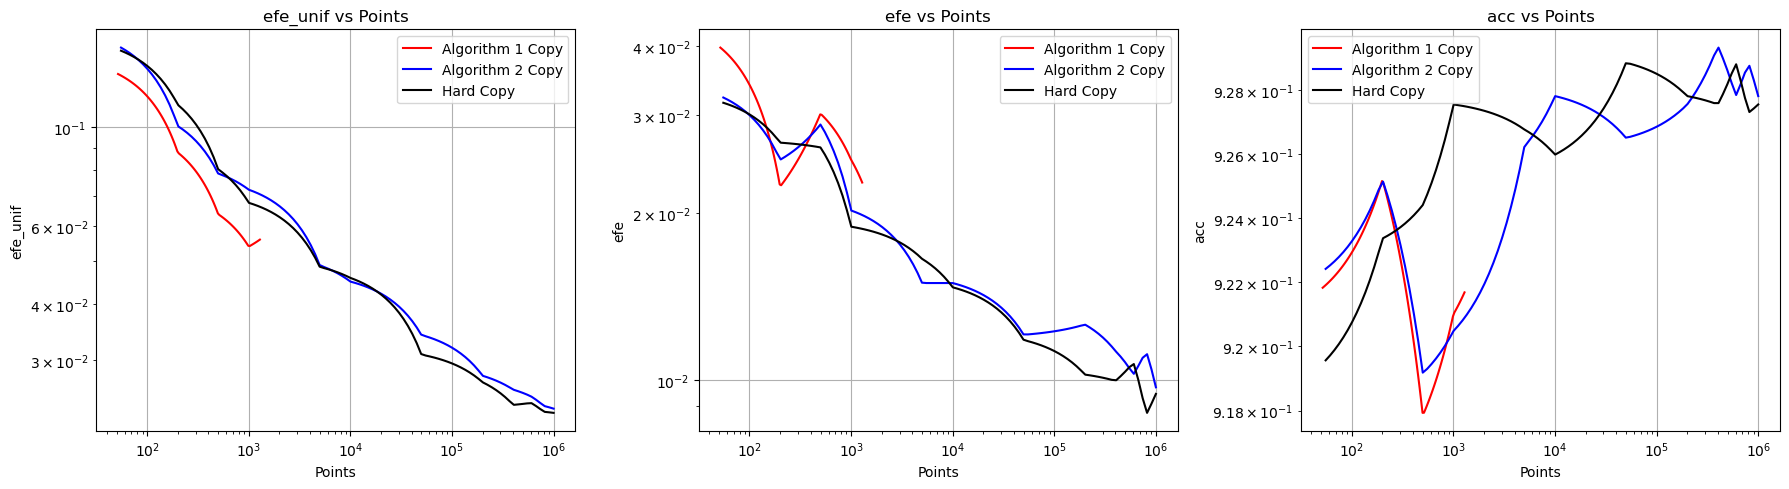

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9213   0.0046 0.0231   0.0128      0.0569        0.0128    1464.6000 106.6782
 Model 2 0.9278   0.0043 0.0097   0.0032      0.0233        0.0032 1000000.0000   0.0000
 Model 3 0.9276   0.0057 0.0094   0.0038      0.0228        0.0030 1000000.0000   0.0000
Blackbox 0.9260   0.0039                                                                


In [17]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_1_3_seed")
print(summary_df.to_string(index=False))

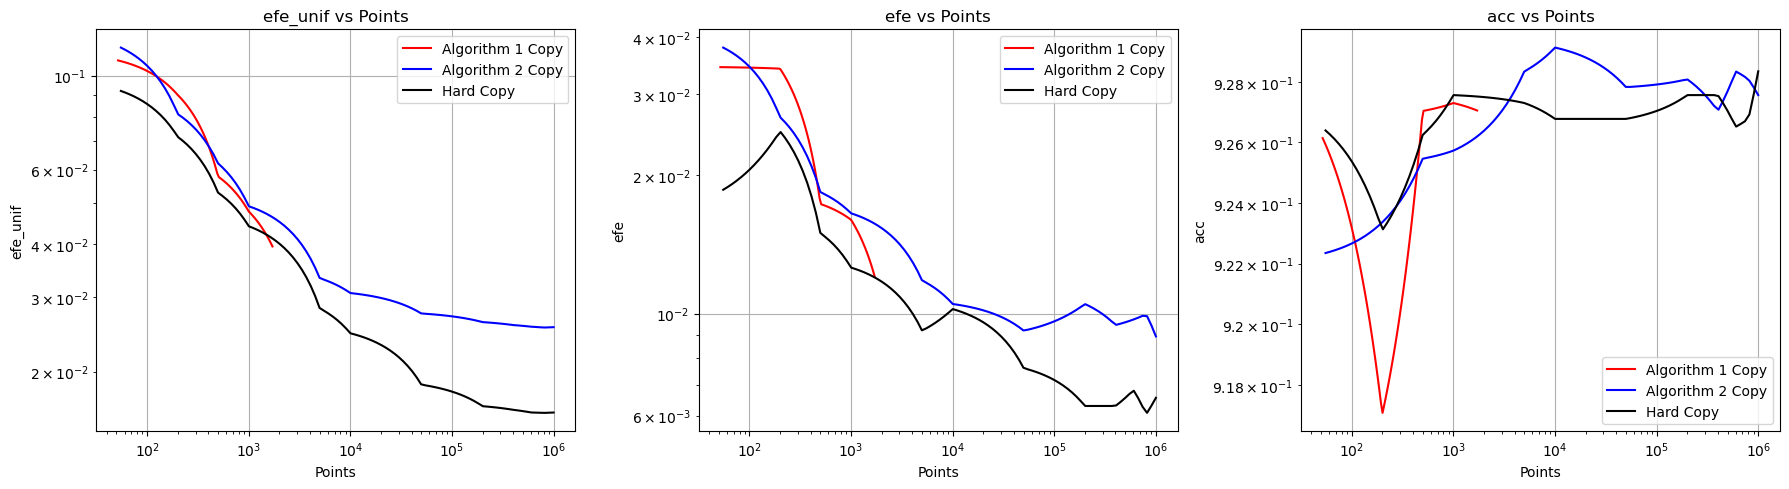

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9270   0.0041 0.0115   0.0042      0.0388        0.0018    1785.8000  44.7678
 Model 2 0.9276   0.0046 0.0089   0.0023      0.0255        0.0022 1000000.0000   0.0000
 Model 3 0.9283   0.0029 0.0066   0.0019      0.0160        0.0011 1000000.0000   0.0000
Blackbox 0.9255   0.0033                                                                


In [18]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_1_4_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

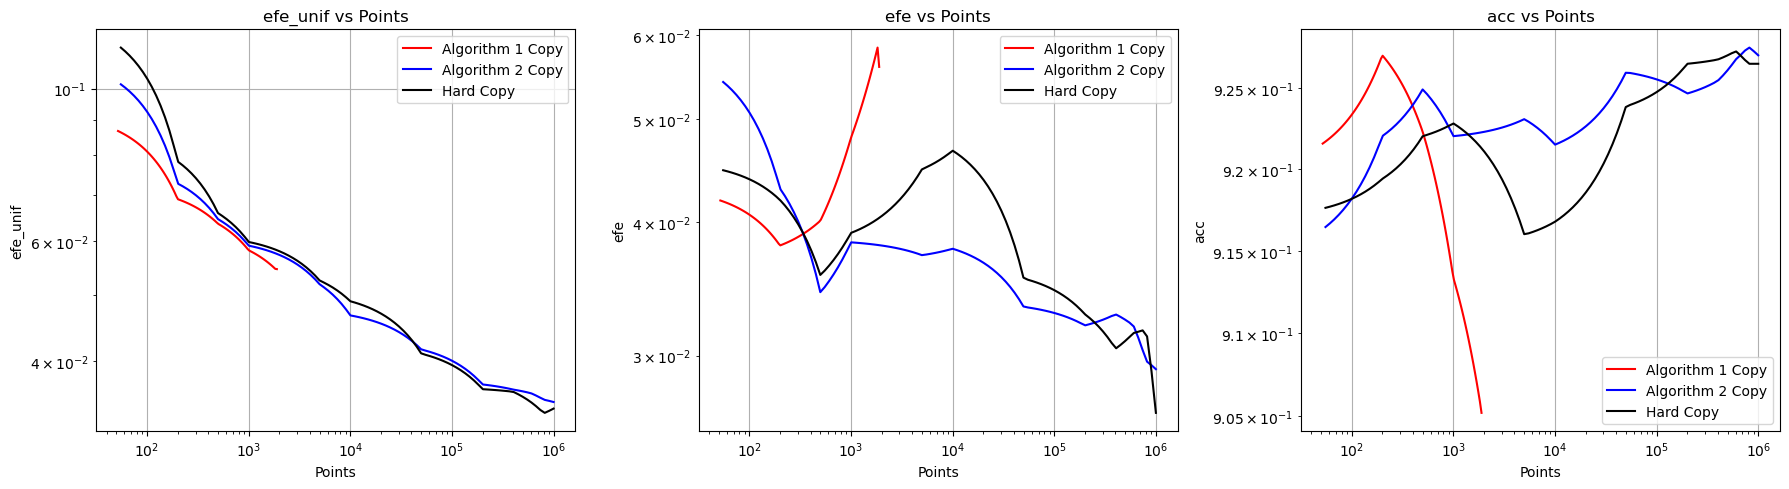

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9047   0.0103 0.0598   0.0086      0.0541        0.0016    1947.6000  28.8832
 Model 2 0.9270   0.0039 0.0291   0.0029      0.0349        0.0034 1000000.0000   0.0000
 Model 3 0.9265   0.0043 0.0265   0.0033      0.0341        0.0021 1000000.0000   0.0000
Blackbox 0.9226   0.0034                                                                


In [19]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_2_1_seed")
print(summary_df.to_string(index=False))

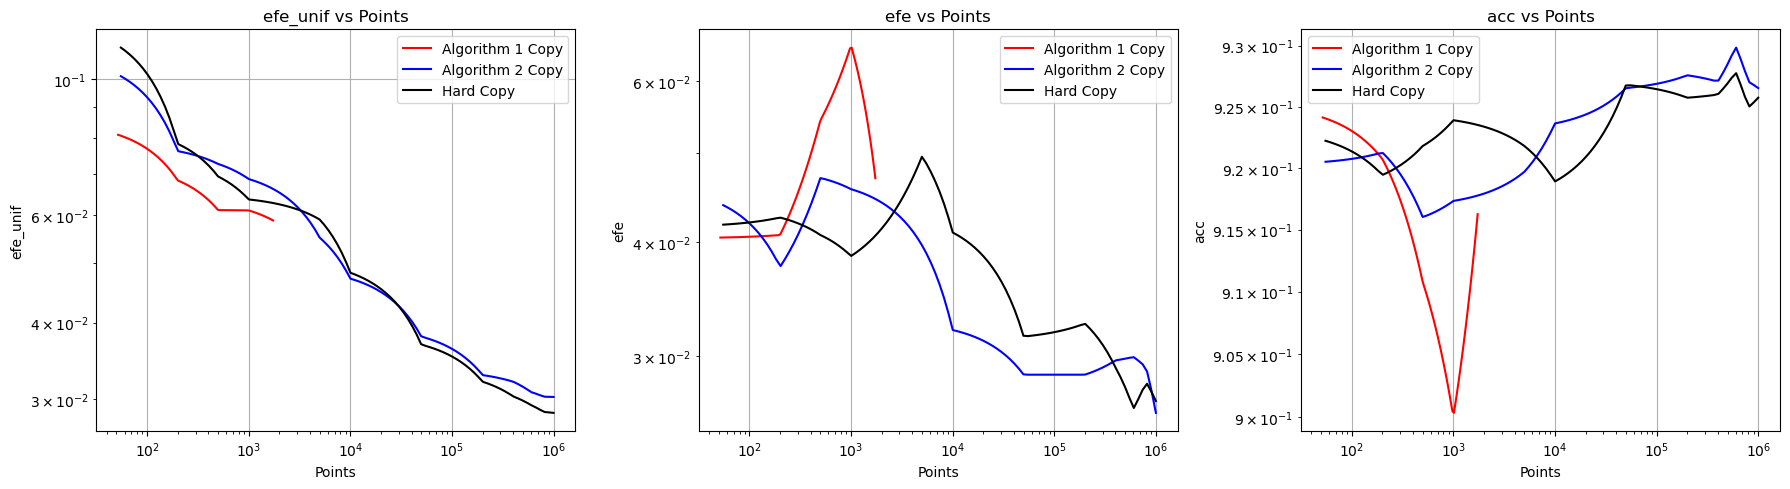

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9194   0.0060 0.0436   0.0121      0.0582        0.0025    1918.8000  96.3606
 Model 2 0.9265   0.0034 0.0260   0.0061      0.0302        0.0028 1000000.0000   0.0000
 Model 3 0.9257   0.0043 0.0268   0.0024      0.0285        0.0016 1000000.0000   0.0000
Blackbox 0.9226   0.0034                                                                


In [20]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_2_2_seed")
print(summary_df.to_string(index=False))

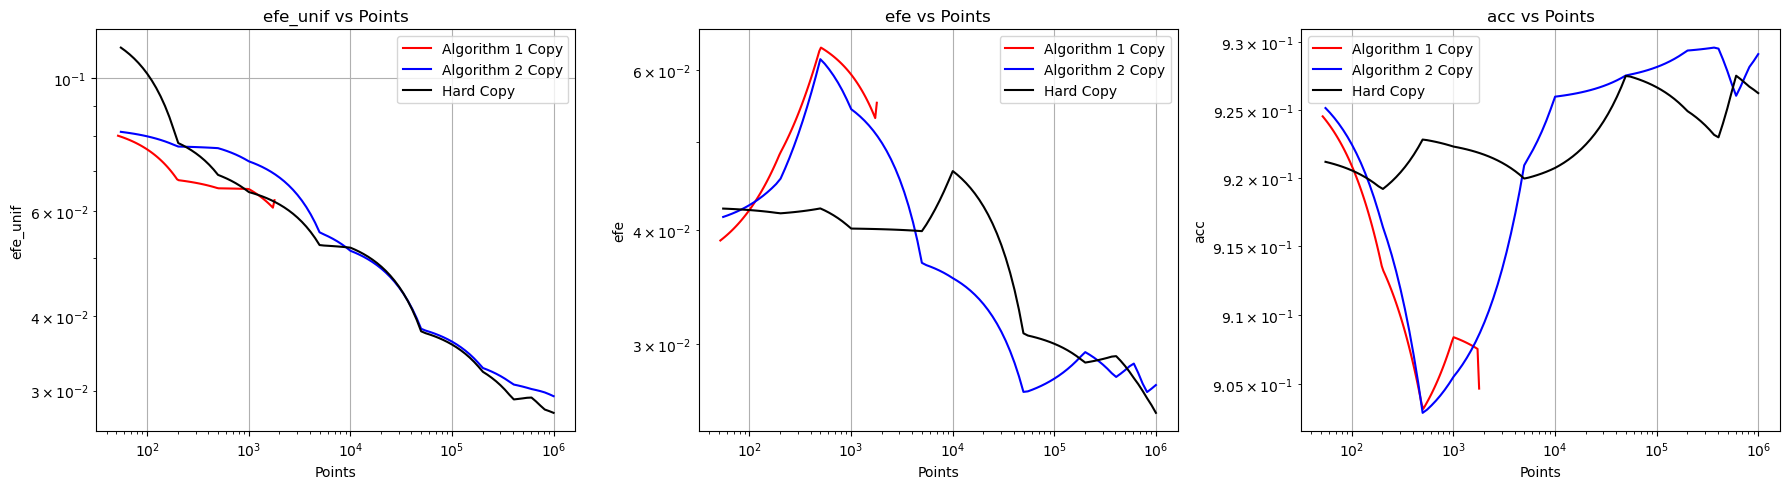

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9073   0.0273 0.0525   0.0271      0.0599        0.0115    1844.6000  37.9874
 Model 2 0.9291   0.0044 0.0270   0.0044      0.0294        0.0020 1000000.0000   0.0000
 Model 3 0.9262   0.0041 0.0252   0.0035      0.0275        0.0012 1000000.0000   0.0000
Blackbox 0.9226   0.0034                                                                


In [21]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_2_3_seed")
print(summary_df.to_string(index=False))

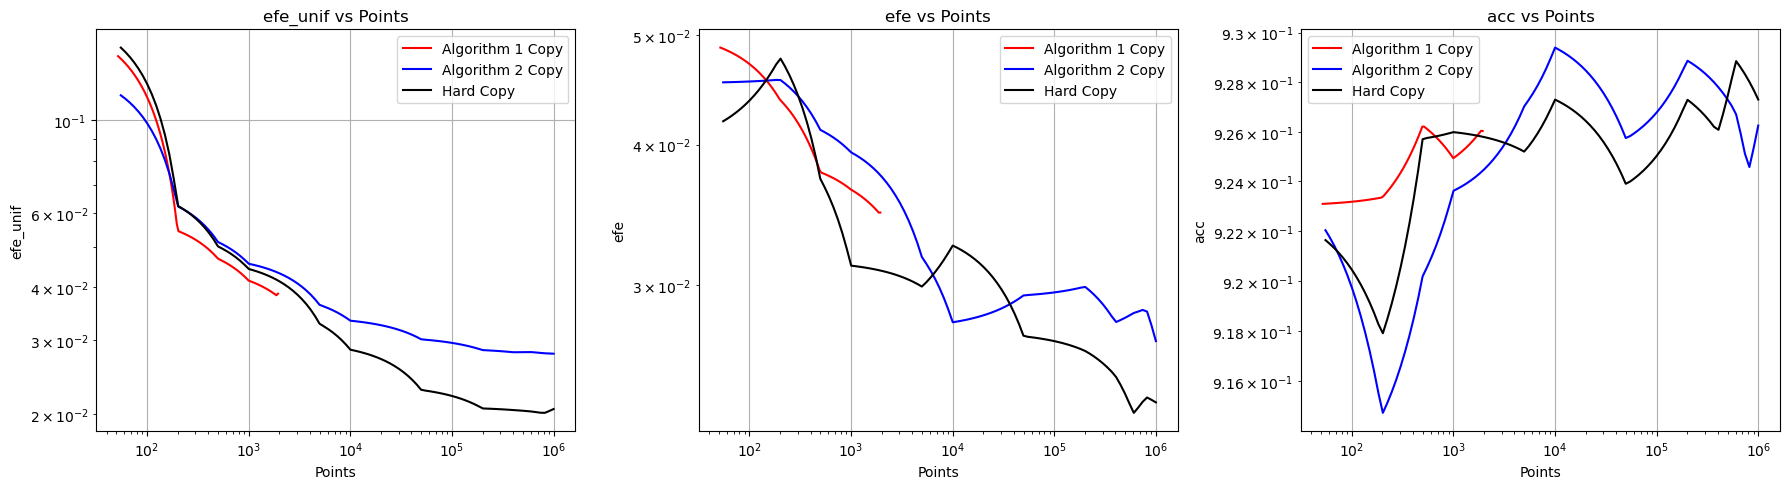

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9265   0.0048 0.0344   0.0025      0.0376        0.0025    2064.2000  74.7433
 Model 2 0.9262   0.0054 0.0268   0.0027      0.0278        0.0023 1000000.0000   0.0000
 Model 3 0.9273   0.0053 0.0236   0.0017      0.0206        0.0024 1000000.0000   0.0000
Blackbox 0.9226   0.0034                                                                


In [22]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_2_4_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

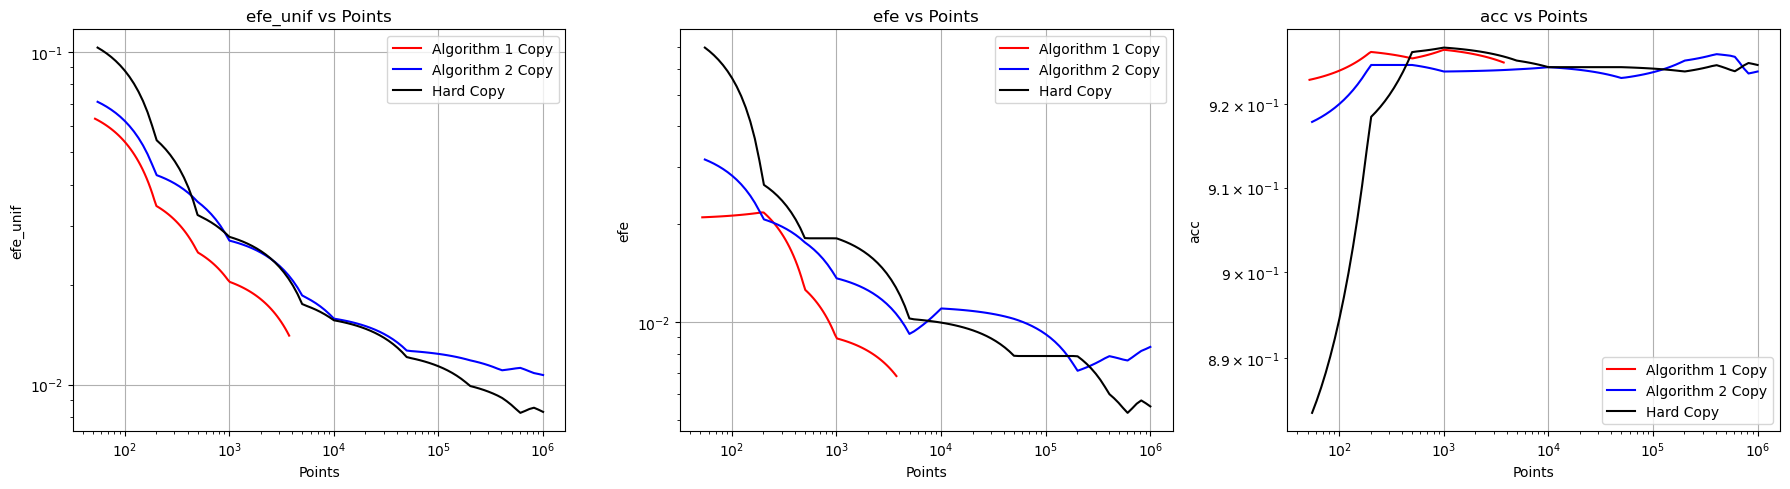

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9249   0.0036 0.0068   0.0040      0.0135        0.0010    3972.6000 128.6384
 Model 2 0.9239   0.0049 0.0084   0.0038      0.0107        0.0013 1000000.0000   0.0000
 Model 3 0.9247   0.0067 0.0055   0.0030      0.0083        0.0011 1000000.0000   0.0000
Blackbox 0.9239   0.0053                                                                


In [23]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_3_1_seed")
print(summary_df.to_string(index=False))

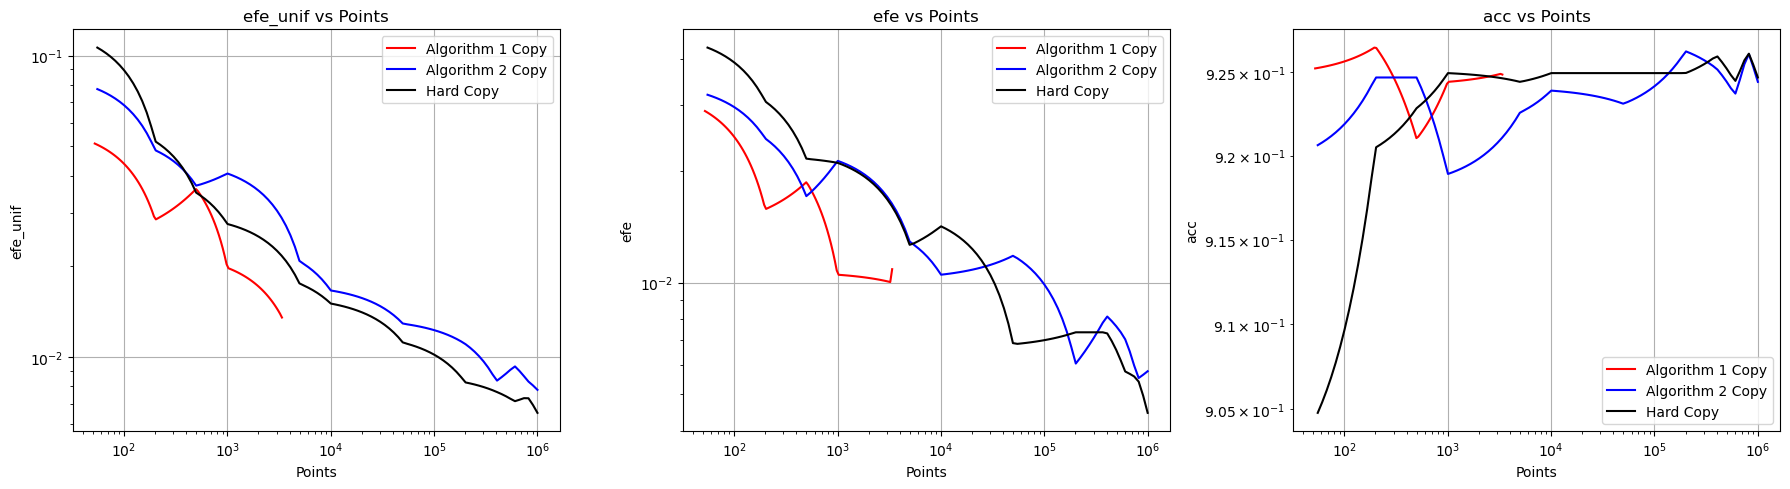

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9249   0.0041 0.0100   0.0031      0.0129        0.0009    3780.6000 220.1032
 Model 2 0.9244   0.0043 0.0058   0.0032      0.0078        0.0006 1000000.0000   0.0000
 Model 3 0.9247   0.0040 0.0045   0.0026      0.0065        0.0010 1000000.0000   0.0000
Blackbox 0.9249   0.0040                                                                


In [24]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_3_2_seed")
print(summary_df.to_string(index=False))

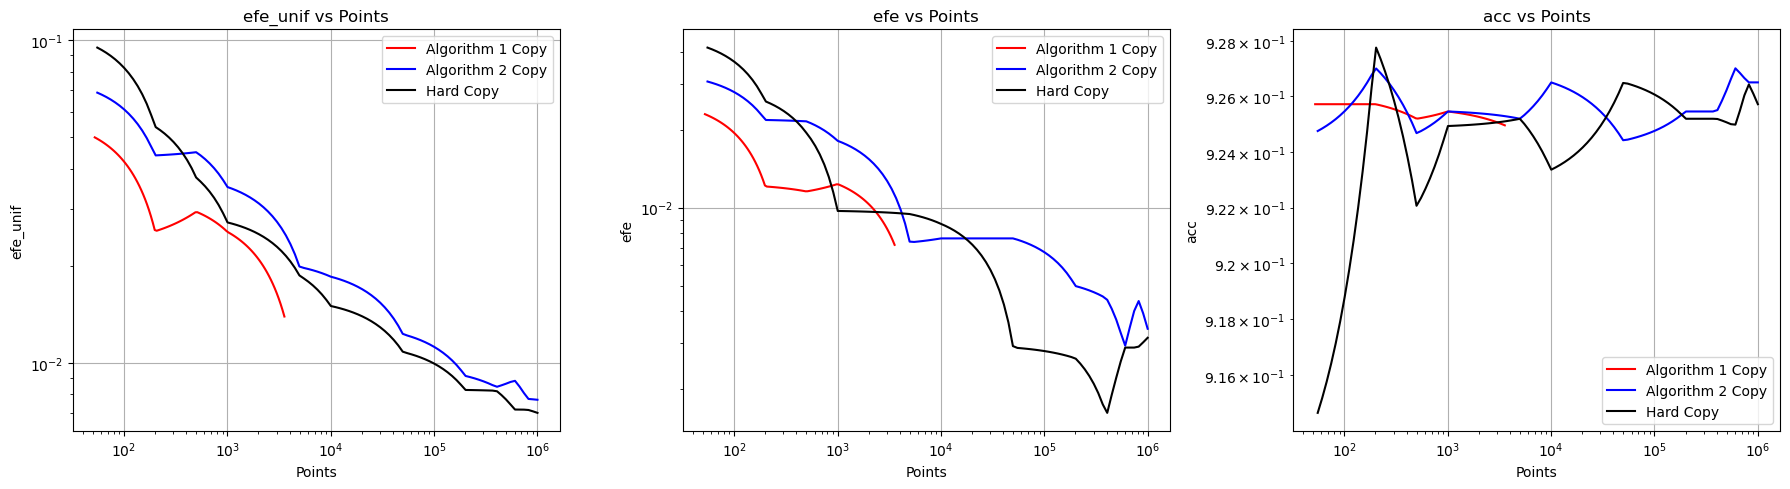

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9249   0.0027 0.0071   0.0027      0.0137        0.0027    3632.0000  51.5480
 Model 2 0.9265   0.0055 0.0034   0.0020      0.0077        0.0009 1000000.0000   0.0000
 Model 3 0.9257   0.0045 0.0031   0.0010      0.0070        0.0018 1000000.0000   0.0000
Blackbox 0.9247   0.0045                                                                


In [25]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_3_3_seed")
print(summary_df.to_string(index=False))

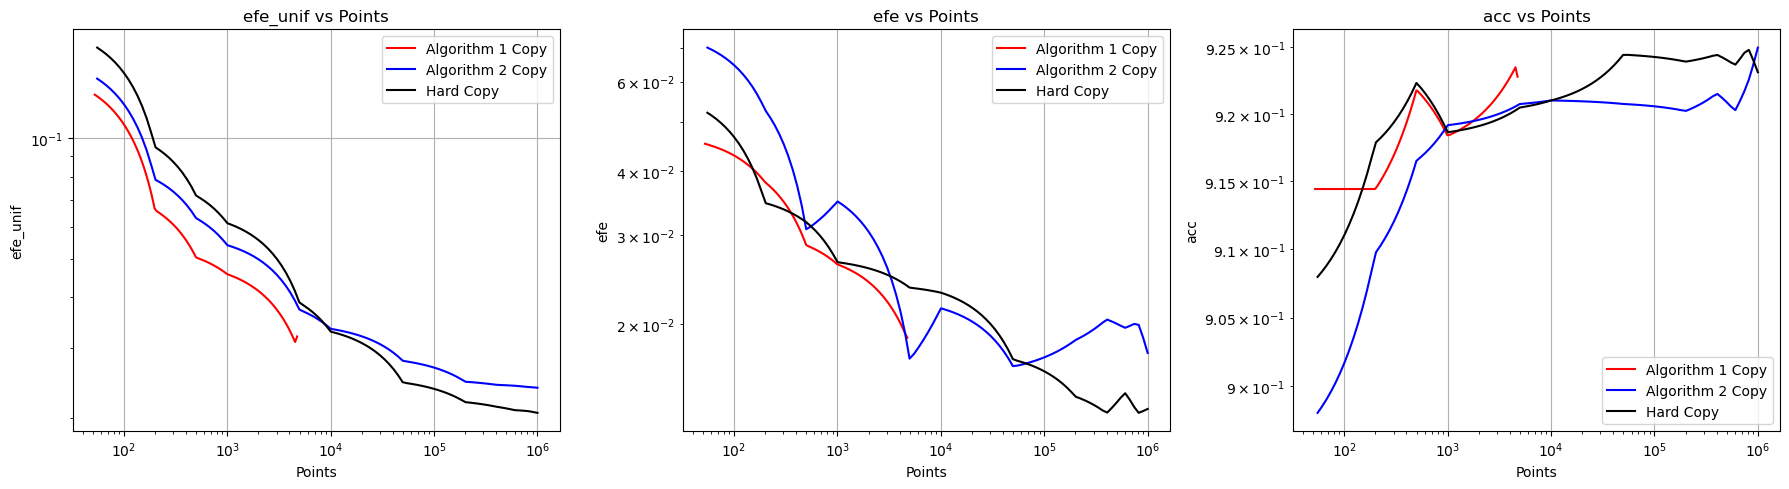

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9239   0.0058 0.0186   0.0027      0.0298        0.0038    4813.4000  53.3914
 Model 2 0.9249   0.0061 0.0176   0.0065      0.0238        0.0033 1000000.0000   0.0000
 Model 3 0.9231   0.0045 0.0136   0.0047      0.0206        0.0032 1000000.0000   0.0000
Blackbox 0.9241   0.0049                                                                


In [26]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS5_3_4_seed")
print(summary_df.to_string(index=False))

## Connectionist bench (mines vs rocks) dataset

### Black box 1: Random Forest classifier

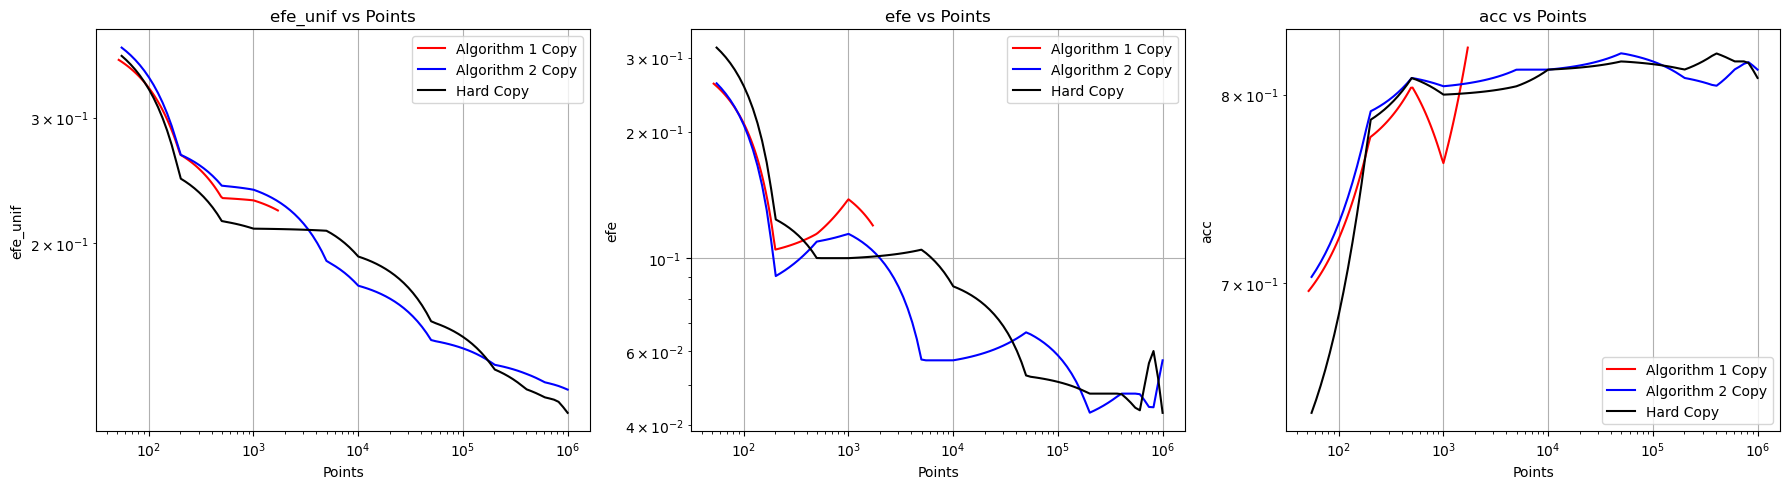

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8286   0.0530 0.1190   0.0261      0.2218        0.0093    1732.4000  13.9657
 Model 2 0.8143   0.0316 0.0571   0.0243      0.1244        0.0066 1000000.0000   0.0000
 Model 3 0.8095   0.0398 0.0429   0.0278      0.1154        0.0101 1000000.0000   0.0000
Blackbox 0.8333   0.0452                                                                


In [27]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_1_1_seed")
print(summary_df.to_string(index=False))

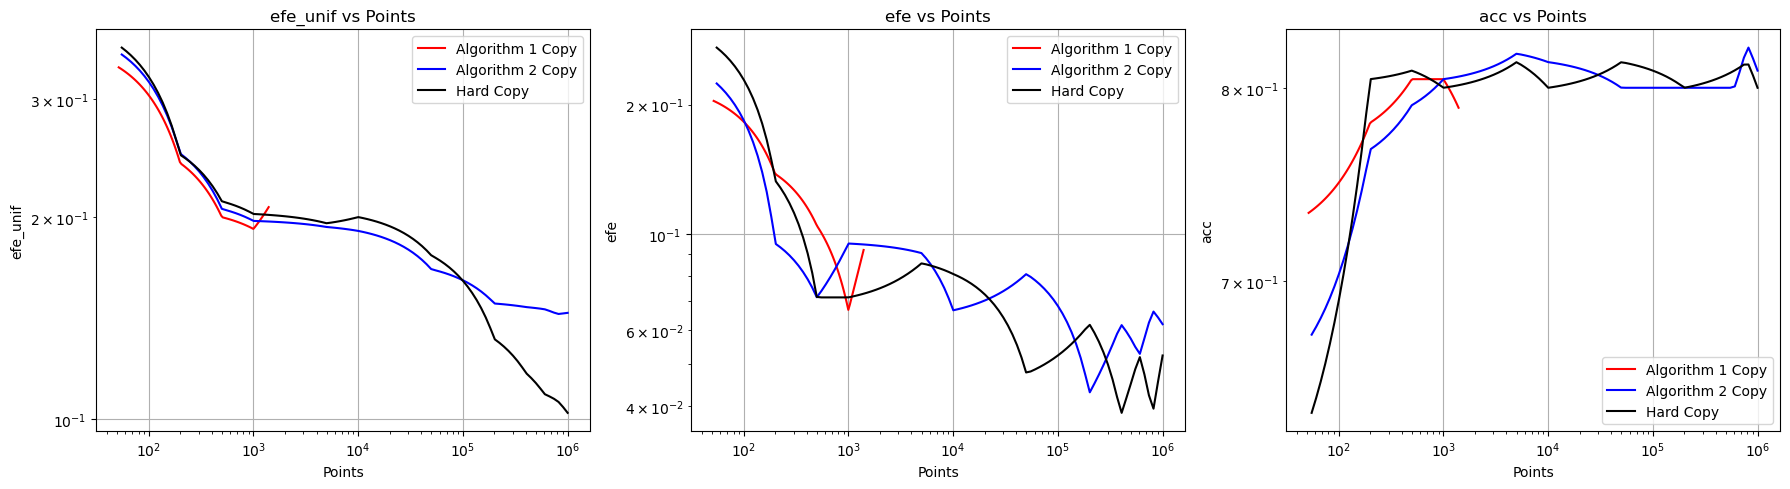

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.7857   0.0499 0.0952   0.0398      0.2105        0.0164    1518.0000 105.1798
 Model 2 0.8095   0.0398 0.0619   0.0323      0.1440        0.0060 1000000.0000   0.0000
 Model 3 0.8000   0.0716 0.0524   0.0350      0.1021        0.0043 1000000.0000   0.0000
Blackbox 0.8143   0.0697                                                                


In [28]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_1_2_seed")
print(summary_df.to_string(index=False))

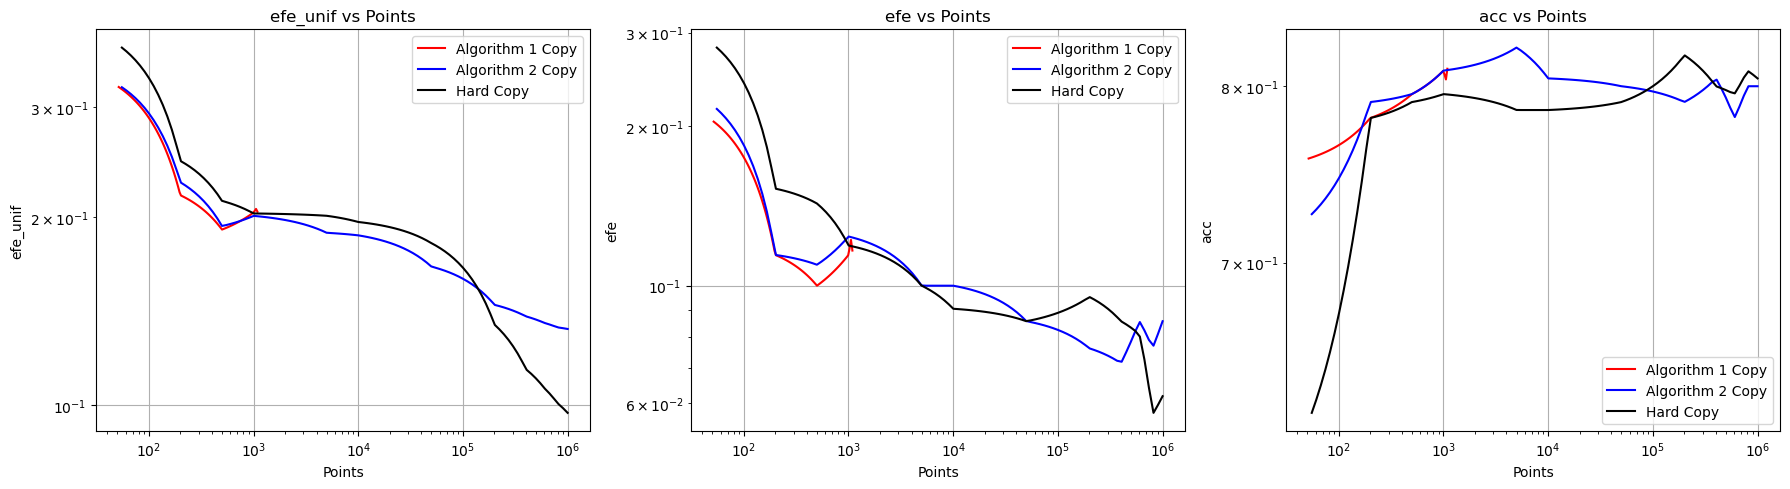

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8095   0.0722 0.1143   0.0410      0.2157        0.0163    1202.2000  70.7655
 Model 2 0.8000   0.0387 0.0857   0.0415      0.1324        0.0074 1000000.0000   0.0000
 Model 3 0.8048   0.0436 0.0619   0.0323      0.0971        0.0042 1000000.0000   0.0000
Blackbox 0.8000   0.0513                                                                


In [29]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_1_3_seed")
print(summary_df.to_string(index=False))

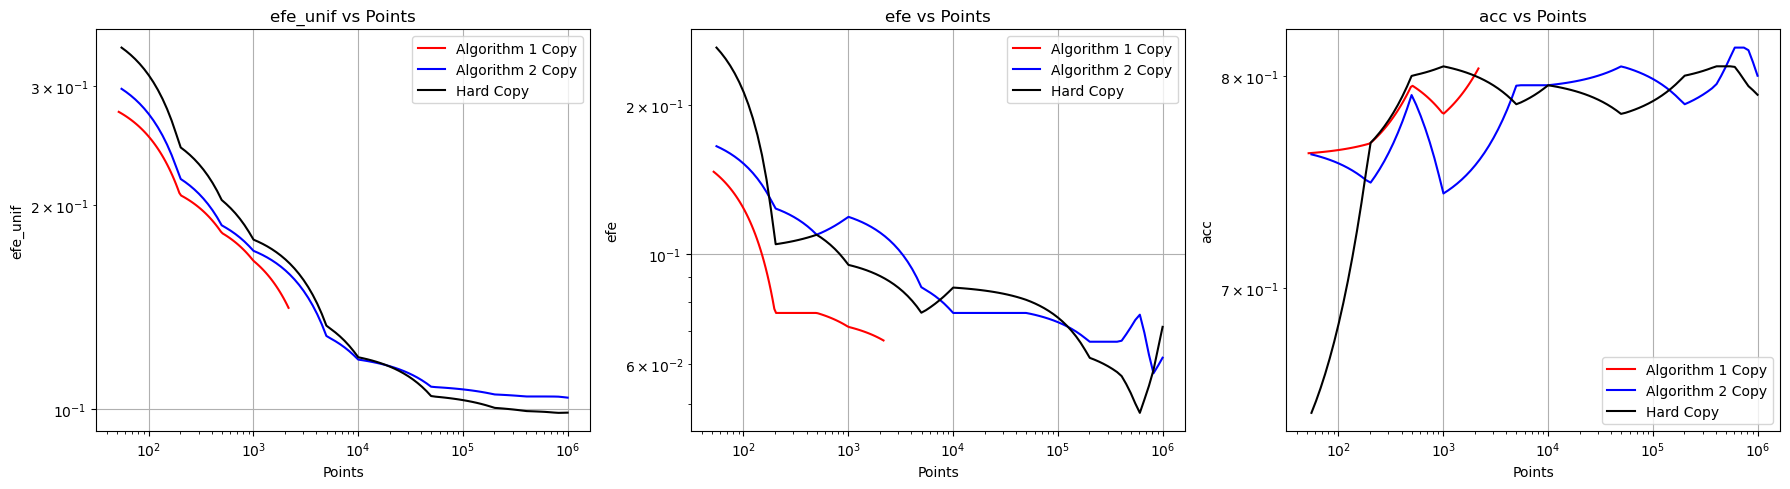

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8048   0.0713 0.0667   0.0278      0.1402        0.0079    2220.2000  43.4253
 Model 2 0.8000   0.0700 0.0619   0.0190      0.1040        0.0043 1000000.0000   0.0000
 Model 3 0.7905   0.0759 0.0714   0.0261      0.0988        0.0047 1000000.0000   0.0000
Blackbox 0.8238   0.0513                                                                


In [30]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_1_4_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

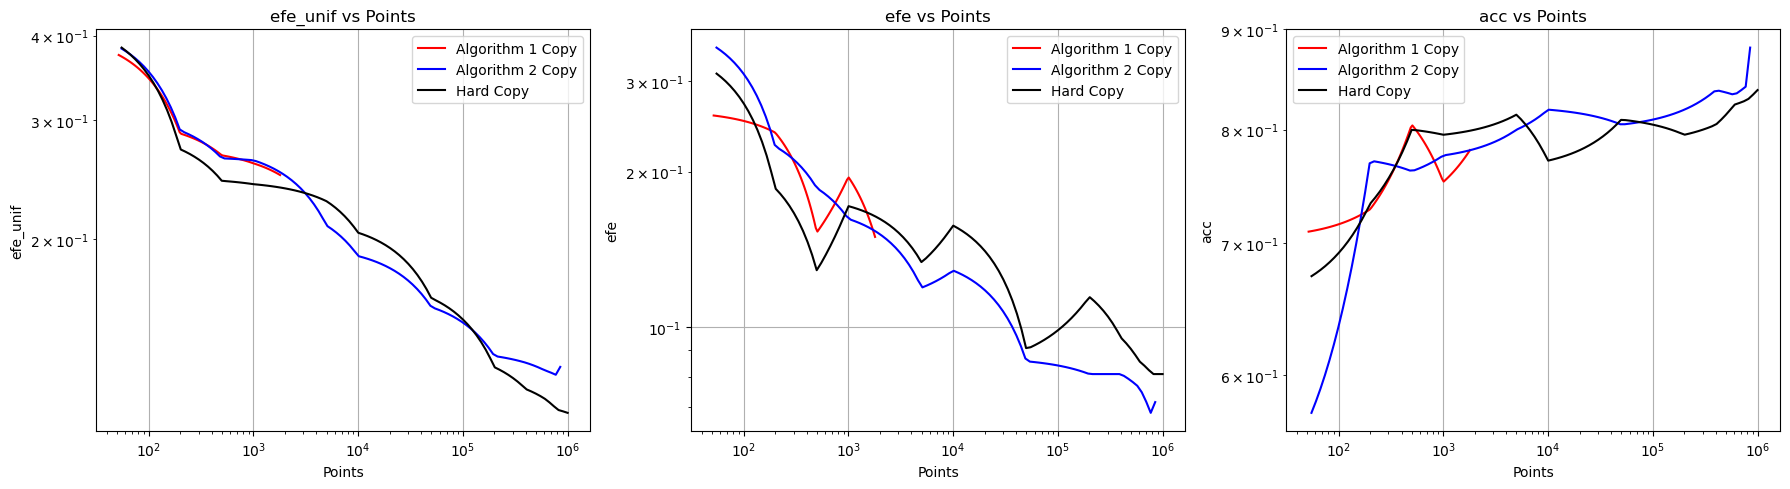

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.7810   0.0591 0.1476   0.0530      0.2484        0.0101    1828.8000    17.1278
 Model 2 0.8381   0.0436 0.0619   0.0387      0.1264        0.0098  880025.0000 24494.8974
 Model 3 0.8381   0.0410 0.0810   0.0415      0.1108        0.0107 1000000.0000     0.0000
Blackbox 0.8714   0.0667                                                                  


In [31]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_2_1_seed")
print(summary_df.to_string(index=False))

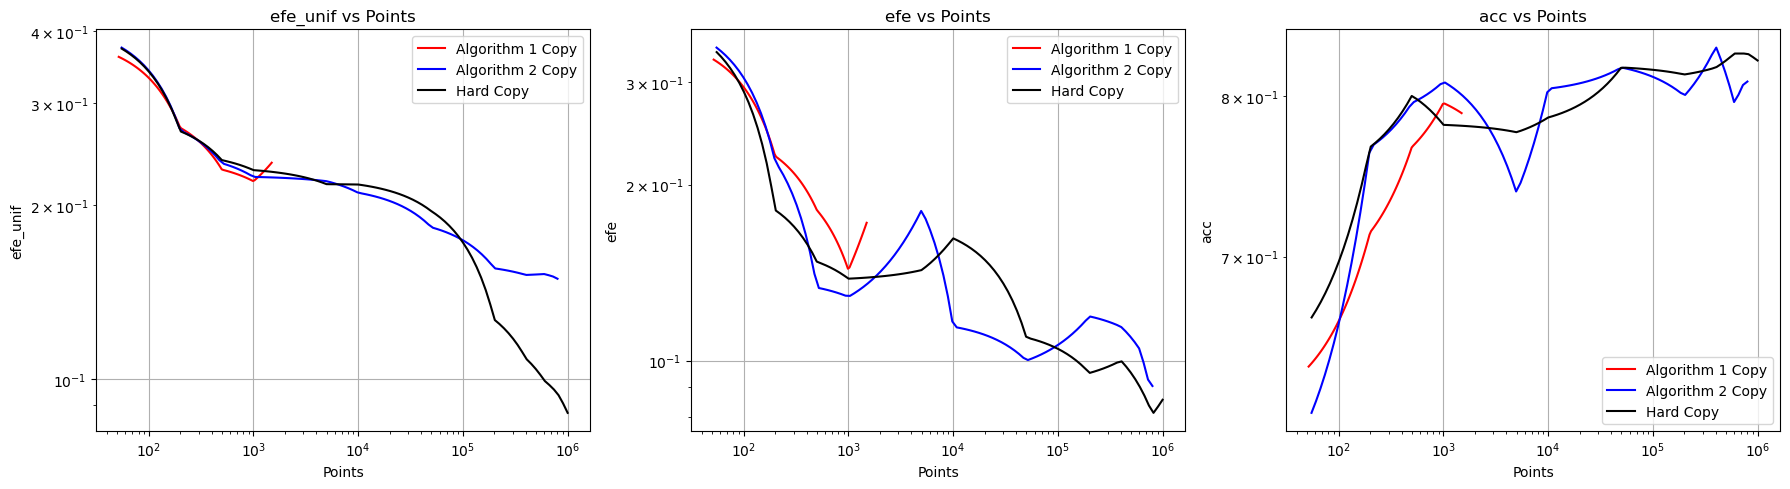

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.7857   0.0261 0.1810   0.0575      0.2396        0.0124    1619.6000    97.2782
 Model 2 0.8333   0.0261 0.0952   0.0369      0.1504        0.0144  855490.0000 33458.4055
 Model 3 0.8238   0.0243 0.0857   0.0356      0.0874        0.0097 1000000.0000     0.0000
Blackbox 0.8714   0.0667                                                                  


In [32]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_2_2_seed")
print(summary_df.to_string(index=False))

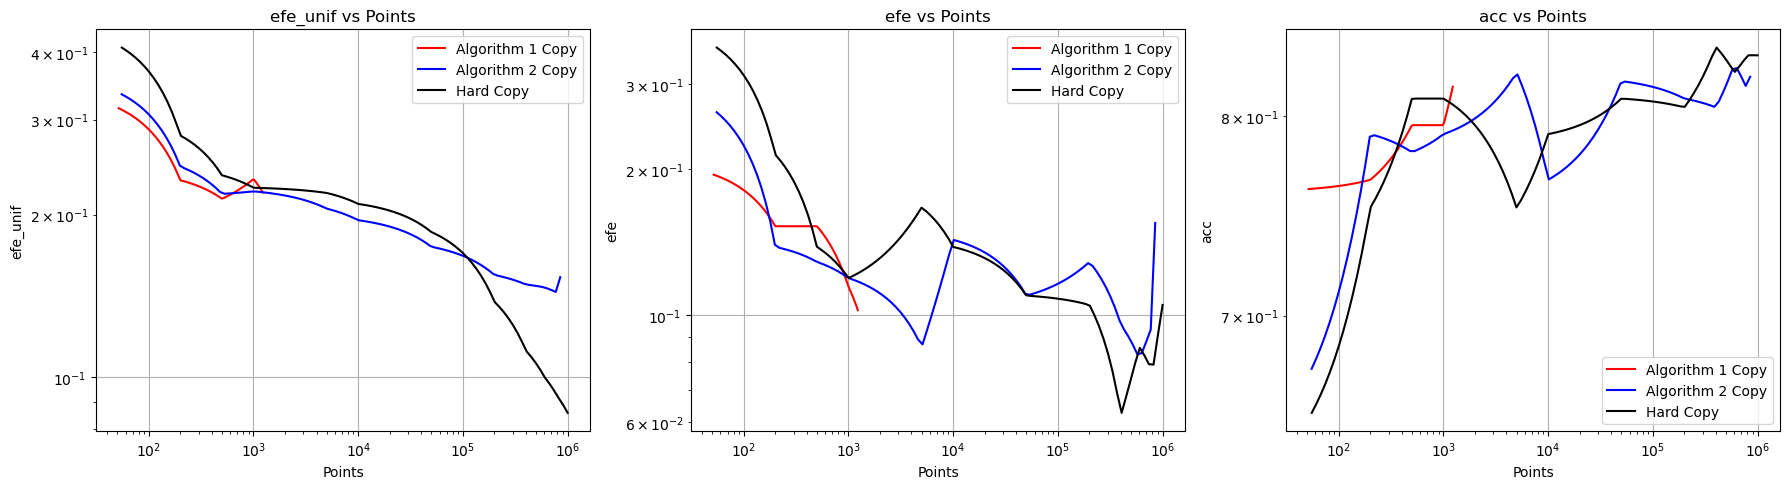

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.8190   0.0442 0.1000   0.0178      0.2163        0.0097    1292.0000    47.7996
 Model 2 0.8143   0.0381 0.1048   0.0513      0.1415        0.0096  860025.0000 20000.0000
 Model 3 0.8333   0.0398 0.1048   0.0323      0.0858        0.0067 1000000.0000     0.0000
Blackbox 0.8714   0.0667                                                                  


In [33]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_2_3_seed")
print(summary_df.to_string(index=False))

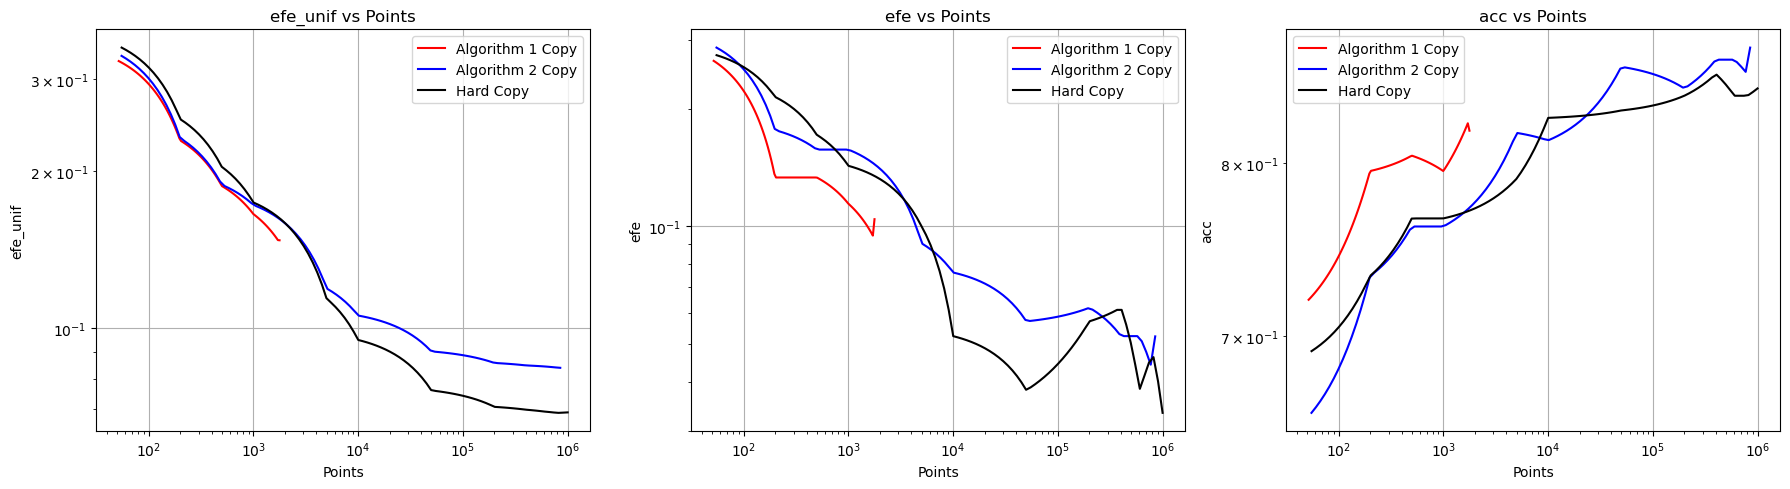

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.8476   0.0190 0.0810   0.0323      0.1354        0.0061    2240.6000   236.2326
 Model 2 0.8476   0.0535 0.0524   0.0095      0.0838        0.0014  874385.0000 16168.6007
 Model 3 0.8476   0.0442 0.0333   0.0243      0.0691        0.0045 1000000.0000     0.0000
Blackbox 0.8714   0.0667                                                                  


In [34]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_2_4_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

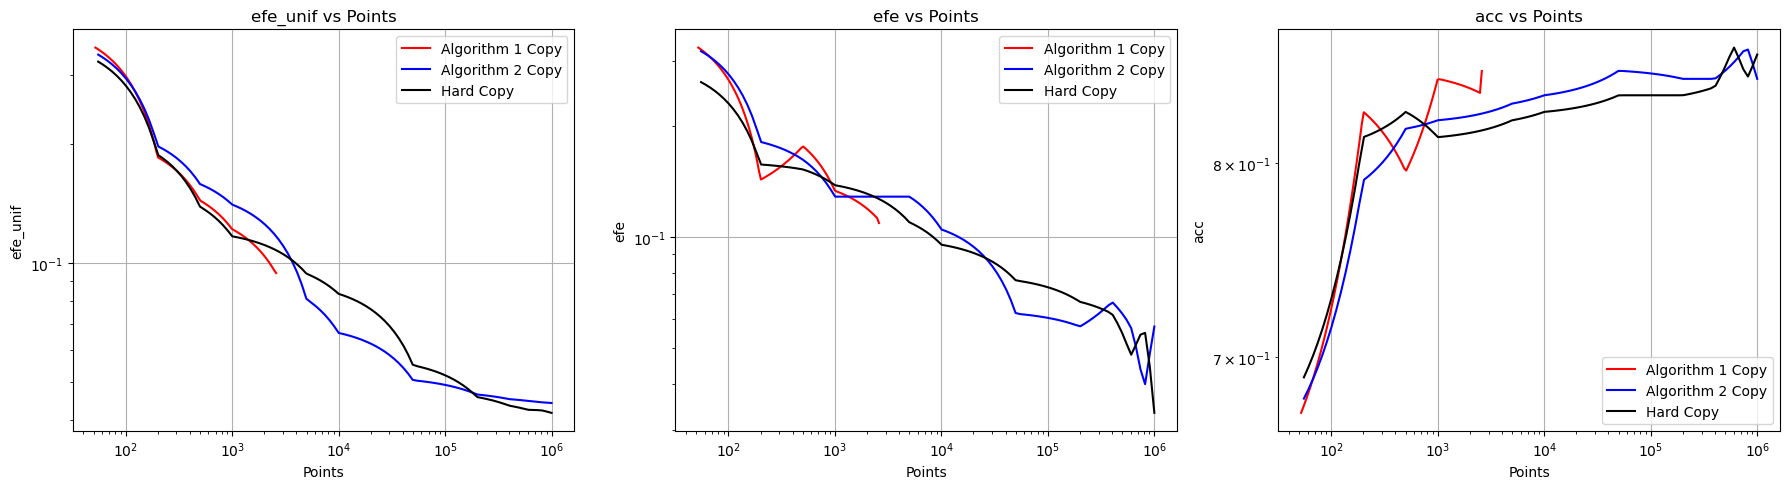

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8381   0.0316 0.1048   0.0387      0.0892        0.0041    2863.8000 139.9949
 Model 2 0.8476   0.0387 0.0571   0.0356      0.0441        0.0029 1000000.0000   0.0000
 Model 3 0.8619   0.0381 0.0333   0.0243      0.0417        0.0031 1000000.0000   0.0000
Blackbox 0.8857   0.0350                                                                


In [35]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_3_1_seed")
print(summary_df.to_string(index=False))

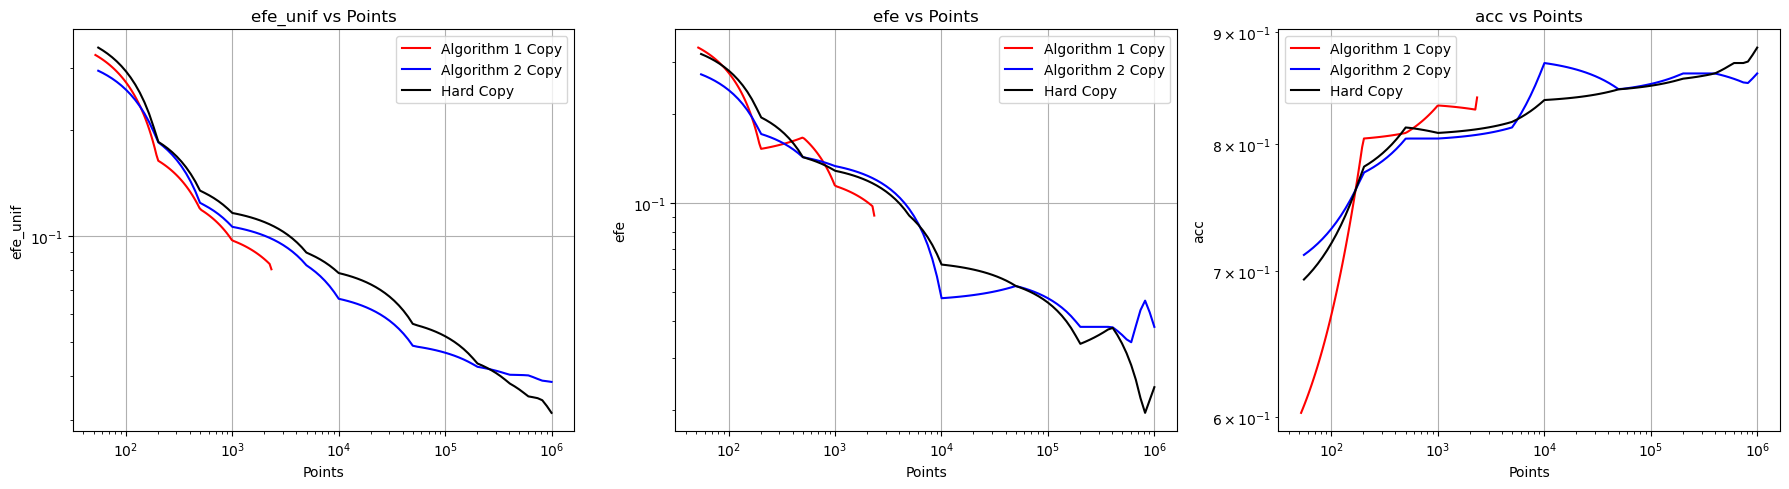

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8286   0.0278 0.0905   0.0233      0.0791        0.0061    2610.2000 178.7595
 Model 2 0.8619   0.0316 0.0381   0.0117      0.0384        0.0016 1000000.0000   0.0000
 Model 3 0.8857   0.0381 0.0238   0.0151      0.0313        0.0012 1000000.0000   0.0000
Blackbox 0.8810   0.0301                                                                


In [36]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_3_2_seed")
print(summary_df.to_string(index=False))

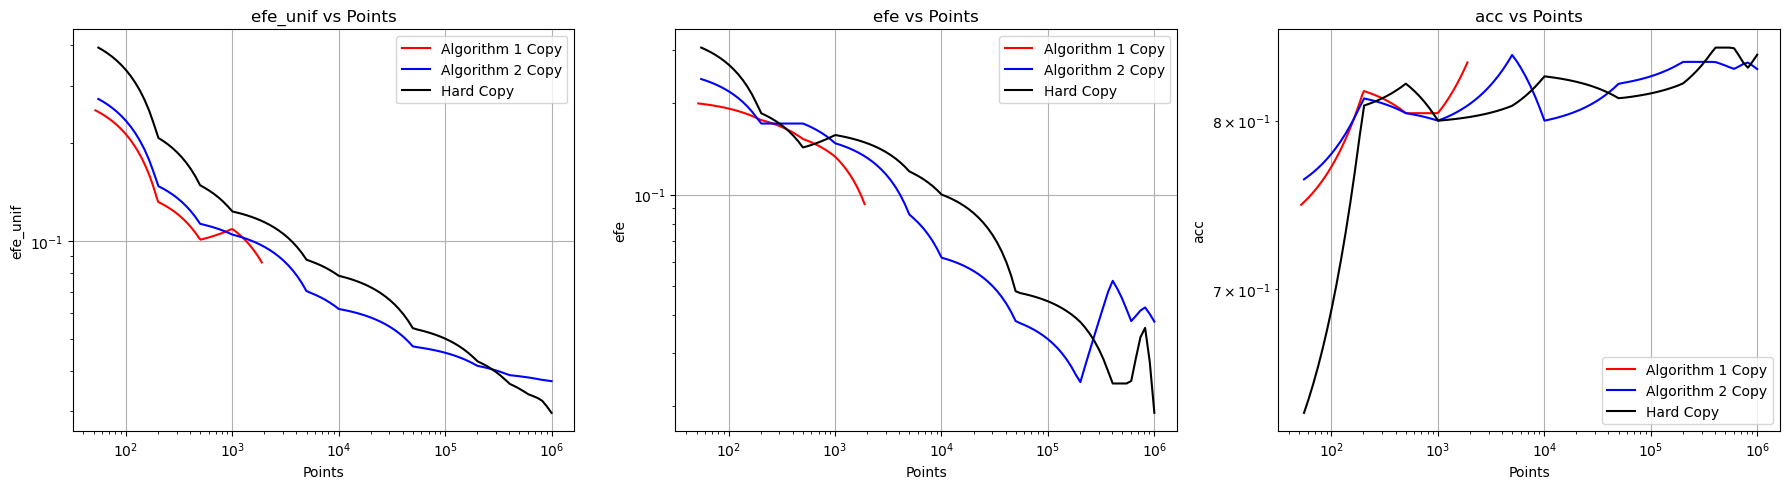

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8381   0.0508 0.0905   0.0410      0.0822        0.0111    1978.0000  74.6539
 Model 2 0.8333   0.0499 0.0381   0.0243      0.0371        0.0019 1000000.0000   0.0000
 Model 3 0.8429   0.0387 0.0190   0.0178      0.0296        0.0011 1000000.0000   0.0000
Blackbox 0.8524   0.0233                                                                


In [37]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_3_3_seed")
print(summary_df.to_string(index=False))

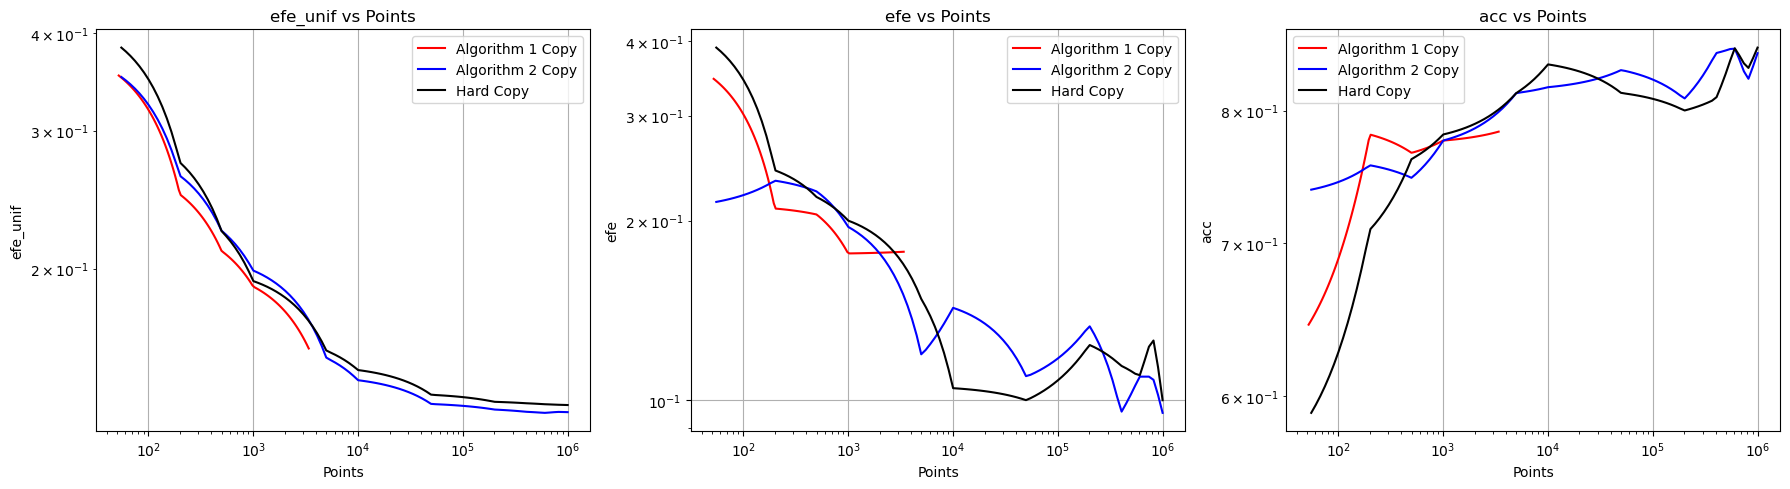

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.7857   0.0673 0.1762   0.0356      0.1543        0.0016    3676.2000 151.1812
 Model 2 0.8476   0.0356 0.0952   0.0369      0.1311        0.0009 1000000.0000   0.0000
 Model 3 0.8524   0.0278 0.1000   0.0316      0.1339        0.0008 1000000.0000   0.0000
Blackbox 0.8857   0.0316                                                                


In [38]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS6_3_4_seed")
print(summary_df.to_string(index=False))